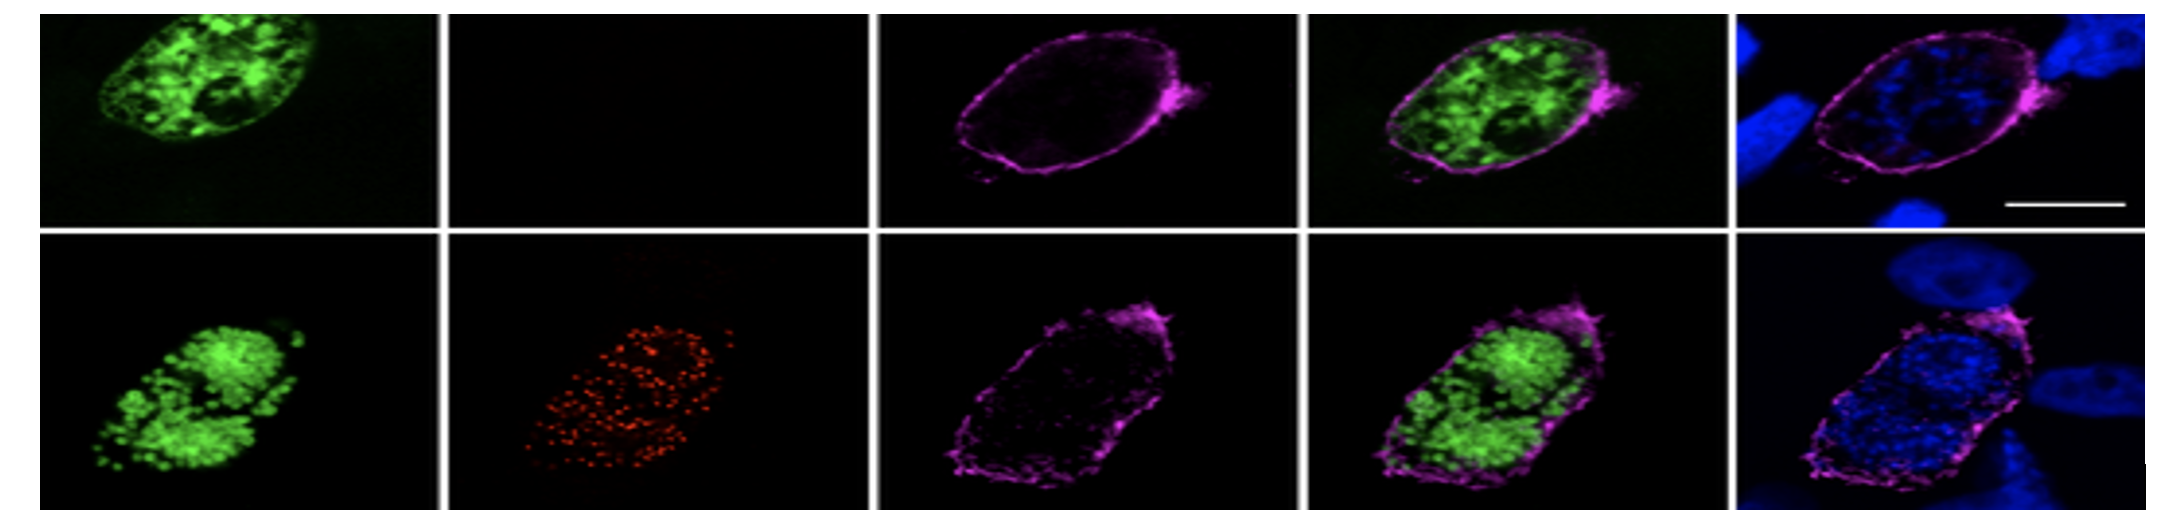

# **MIT Capstone Project: Malarial Detection Using Deep Learning: A Convolutional Neural Networks (CNN) Approach<font color='#CD711B'></font>**

## <div class="alert alert-info"><font color='#19597C'>Submission made by: Rebecca Asiimwe</font></div><br><font color='#CD711B'><font size='4'><i>Full-code version</i></font>
****

### Problem Definition

**The context:** <u>Why is this problem important to solve?</u><br>
<div class="alert alert-info"><font size='2'>Malaria is an infectious and sometimes a fatal disease caused by plasmodium parasites that are transmitted through mosquito bites from female anopheles mosquitoes. Based on World Health Organization reports, there were 228 million cases and 405,000 deaths in 2018 alone. Of these deaths, Africa represented 93% and 94% of the total cases and deaths respectively. More recently (2020), it was estimated that there were 241 million cases of malaria worldwide, of which 627,000 people died from the disease, most of whom were children from sub-Saharan African countries. Many deaths have been attributed to poor health care services and lack of early and effective screening for malaria. It is therefore key to have measures for early detection, diagnosis and treatment to reduce these high mortality rates and the malaria burden worldwide. Current efforts towards malaria detection often involve examining a drop of a patient’s blood under a microscope. The specimen, often spread out on a thin blood smear is stained with Giemsa to give the parasites a distinctive appearance which is used to distinguish healthy from infected cells. Despite its ability to aid malaria detection, this process is quite tedious as it requires manual counting of cells by a trained technician or pathologist. Accuracy could in part depend on the technicians or expatriates examining the slides. This may leave many cases to go undiagnosed including late diagnoses that could contribute to the global malaria burden. This problem is therefore important to solve to aid early and accurate detection of malaria and consequently contribute to reducing severe illness and deaths caused by malaria.</font></div><br>

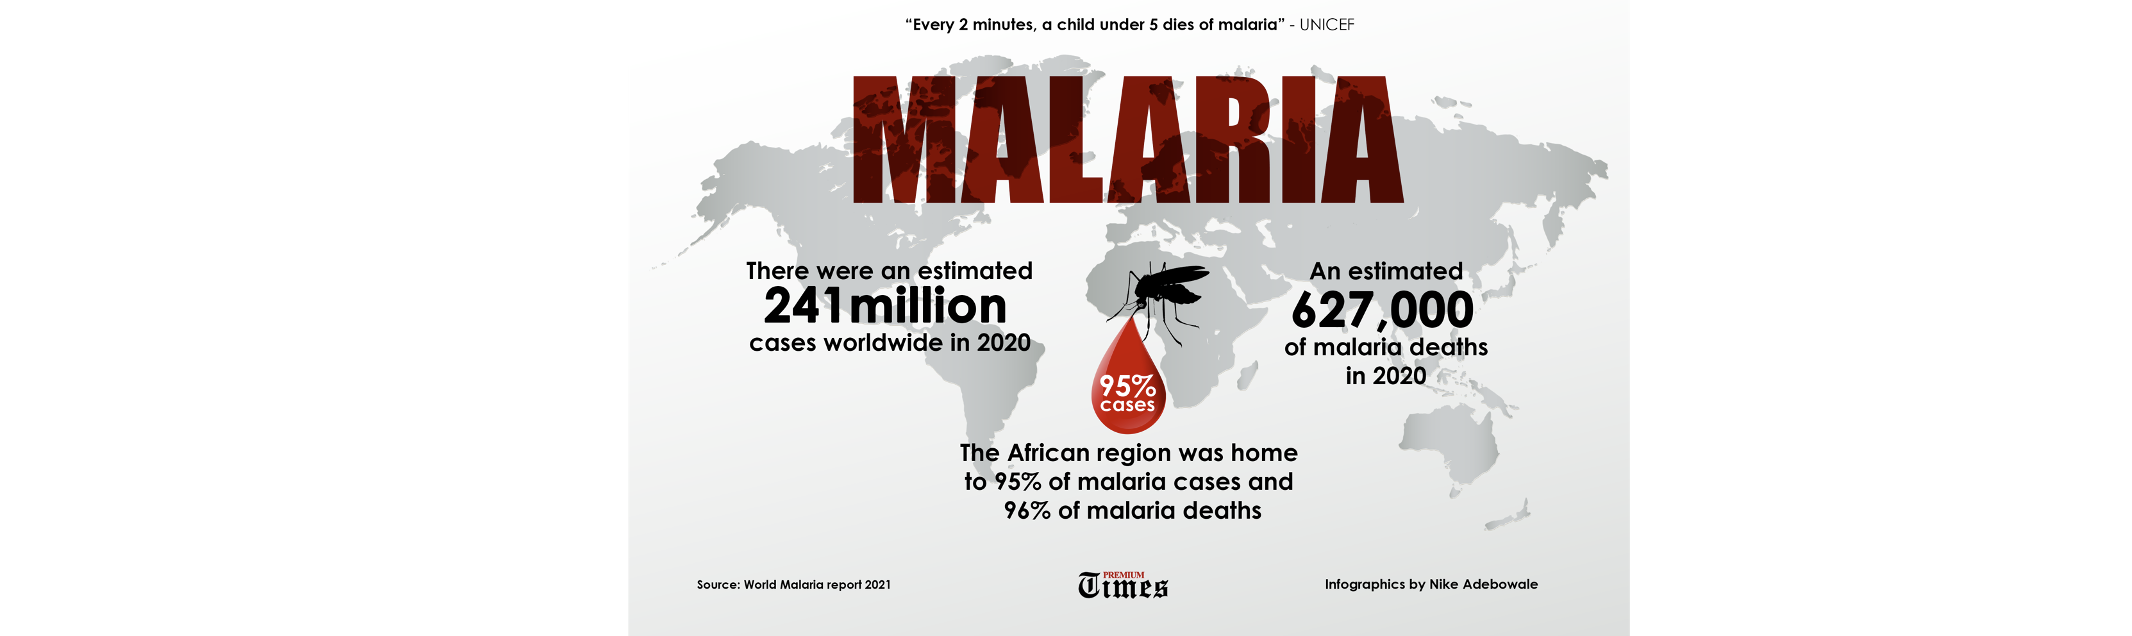

**The objectives:** <u>What is the intended goal?</u><br>
<div class="alert alert-info"><font size='2'>The overall objective of this project is to build an automated and efficient computer vision model to detect malaria by distinguishing malaria parasitized red blood cells from uninfected red blood cells, and to classify which cells are parasitized - that is cells that have the Plasmodium parasite - and which are not (uninfected), in the midst of other cellular impurities.</font></div><br>

**The key questions:** <u>What are the key questions that need to be answered?</u><br>
<div class="alert alert-info"><font size='2'>Before embarking or going deeper into this project, we need to consider the following key questions: What problem do we have at hand (In this case we know that it’s a classification problem)? What kind of data are we working with and what do we know about it (from data collection to the data we have at hand for analysis)? Is it structured on unstructured data? In this case we already know that it’s image data to exclude other possibilities. Knowing this, what do the images look like? Are there some patterns and features we see that we can leverage to aid our classification problem? Is the data balanced? What should we consider as enough data for our classification problem? Do we have missing data? For example, are our data appropriately labeled? How should the data be preprocessed and if it needs transformation, how should it be transformed? Is the data in an appropriate format for input into our neural networks? What type of deep learning algorithms should be applied to this classification problem (ANN (Artificial neural network) vs CNN (Convolutional Neural Network))? Is this a binary or multi-class prediction/classification problem? How should we build our model architecture and what layers/how many should it have? Training our neural networks involves both forward and backward propagation: What activation functions should be applied at the different layers of the network? Given the type of classification problem at hand, what outputs do we expect? How can we optimize our network to reduce the loss during backpropagation and of Stochastic Gradient Descent (SGD), Gradient Descent with Momentum, Adagrad (Adaptive Gradient Algorithm) and Adam (Adaptive Moment Estimation), what optimization algorithm should we apply given the classification problem at hand? What loss function should we apply to minimize the error in the output layer? As this is a classification problem, should we opt for Binary Cross-Entropy or Categorical Cross-Entropy? How can we improve model performance:- What is an appropriated batch size? How best can we fine tune model parameters to improve model performance and what key hyperparameters should be fine-tuned to improve our model? Can adding more layers to the network improve its performance? As our networks tend to get complex, with overfitting as a major and common problem during model training, what regularization techniques can we apply to overcome overfitting, of the available methods, should we opt for are Early Stopping, Batch Normalization, Data Augmentation, Dropout, weight decay, e.t.c? Additionally, can data augmentation improve our predictions? Are there other architectures we can leverage through transfer learning? Additionally, can techniques such as gaussian blurring (for images smoothing and noise reduction) and converting our images from the RGB (Red, Green and Blue) to HSV (Hue Saturation Value) color space improve image segmentation and consequently our predictions for which cells are parasitized and which are uninfected? How can we measure model performance/assess the quality oof our predictions? What are the key or important metrics to consider to measure performance of the models? These and more questions will be put into consideration during development of this project and/or solution.</font></div><br>

**The problem formulation:** <u>What is it that we are trying to solve using data science?</u>
<div class="alert alert-info"><font size='2'>Overall, the problem at hand is a computer vision problem that focuses on enabling computers to identify and understand images or videos including deciphering objects and people within those images. Particularly, we’ll be applying this deep learning approach to automate the process of distinguishing plasmodium parasitized red blood cells from uninfected cells using Convolutional Neural Networks for image classification or prediction. As this is a computational/or computer-based solution, we expect the process of teasing these cells apart to be more efficient, effective and more accurate compared to the current manual microscopic methods.</font></div><br>

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>

###<b> Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Here we are telling google collab where to find our files.
# This is synonymous to specifying the parent directory to the child directories we'll be working with.
# In this case "MyDrive/MIT_ADSP/Milestone_Capstone_Proje ct"

Mounted at /content/drive


### <b>Loading libraries</b>

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import math
import os
import h5py
import zipfile
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import load_img

import warnings
warnings.filterwarnings("ignore")

### <b>Let us load the data</b>

<b>More on data and Source

<div class="alert alert-info"><font size='2'>Based on online research and literature, the dataset used in this project was originally taken from from the National Institute of Health (NIH)/National Center for Biomedical Communications. The dataset contains images of red blood cells from thin blood smear microscopy imaging with Giemsa staining. Staining is often done to enhance visualization of the cell or certain cellular components under a microscope - in this case the malaria causing plasmodium parasite. These samples were taken from a malaria research and screeing activity involving 50 healthy patients and 150 patients infected with the plasmodium parasite. To characterize the images, annotation was manually done by slide reader experts of Mahidol Oxford Tropical Medicine Research Unit Bangkok, Thailand, and collected at the National Library of Medicine (NLM), providing a total of 27, 558 images annotated as infected or uninfected.</font></div>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
# The cell image data we'll be working with was provided as a zipped file and uploaded to Google Drive as such (cell_images.zip).
# In this code chunk, I'll be extracting the files to a directory on the drive from which we can access and work with the files.

# Storing the path of the zipped file with cell_images in a new variable "path" to be referenced downstream.
file_path = '/content/drive/MyDrive/MIT_ADSP/Milestone_Capstone_Project/cell_images.zip'

# ZipFile is a python module used for reading and writing ZIP files. Besides passing the path to the file we need to read,
# we also need to pass the mode parameter specifying wether we are reading from, or writing to a file.
# Here I am specifyiny 'r' for reading an existing file, as we'll be 'reading in' the zipped file for extraction.

with zipfile.ZipFile(file_path, 'r') as zip_ref:
  zip_ref.extractall('.') # extractall() will extract all contents from the archive to the current working directory: /content/cell_images.
  # We can also specify a specific output directory by passing the path to that directory e.g. zip_ref.extractall('/content/drive/MyDrive/MIT_ADSP/Milestone_Capstone_Project')

### <font color='#19597C'><font size='4'><i>Structure of extracted archive:</i></font>

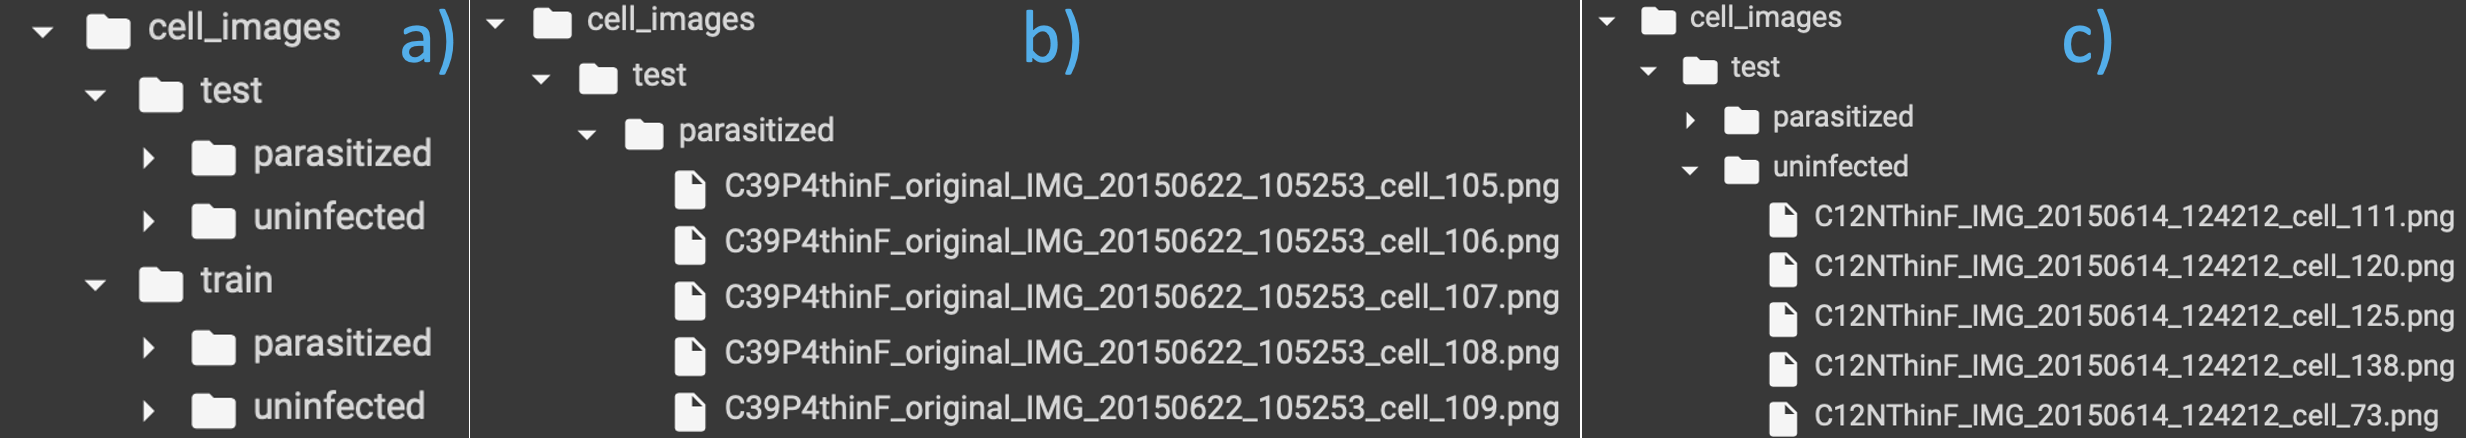

<div class="alert alert-info"><font size='2'> From the above directory structure, we can see that the extracted zipped file (cell_images.zip) has two main directories: <i>"test"</i> and <i>"train"</i> (fig a). Within each of these directories, we see two sub directories <i>"parasitized"</i> and <i>"uninfected"</i> and within each sub directory, we also see multiple .png files that correspond to unique (by file name) cell images that will be analysed downstream. The image below shows examples of images in these respective directories. </font></div>

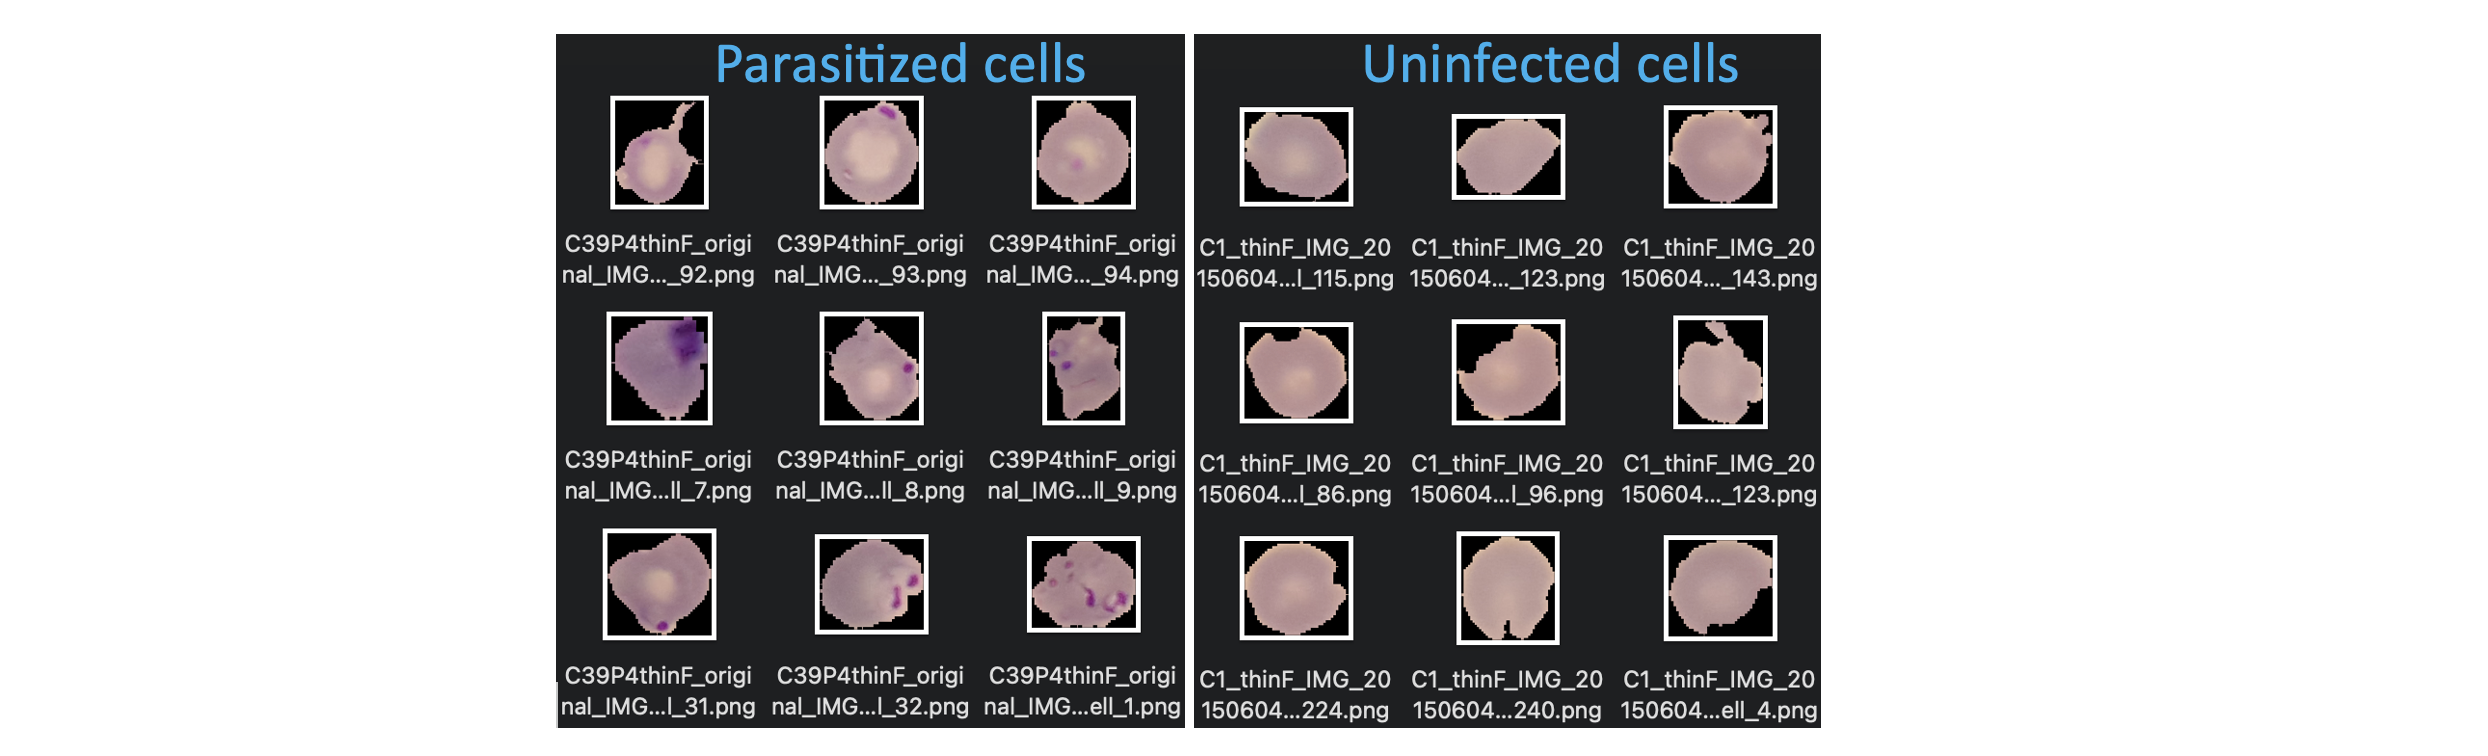

<div class="alert alert-info"><font size='2'> Shown above are examples of extracted images in the parasitized and uninfected directories respectively. As we can see, each file is a named png or portable network graphics file which represents images of cells in both parasitized and uninfected directories. We also already see some differences in images presented in each of these directories/classes, for example, differences in cell morphologies, from sizes, shapes, structures or forms, to differences in color or color intensities in certain sections of the images. Some of these characteristics will need to be factored in in our analyses downstream as these differences (in shapes, size, image orientation) often represent a challenge for most CNN architectures which, for example, expect all images to have the same size. In subsequent sections of this notebook, we'll explore these differences further and see how to deal with them prior to model building.</font></div>

In [ ]:
# Sneak peek into the number of images in each directory
# Train directory
# Paths to directories with parasitized and uninfected images in train set:
train_parasitized_dir = '/content/cell_images/train/parasitized'
train_uninfected_dir = '/content/cell_images/train/uninfected'

# Printing number of images in respective directories
print('Number of images (os call) in the train/parasitized directory is:', len(os.listdir(train_parasitized_dir)),
      'and the number of images in the train/uninfected directory is:', len(os.listdir(train_uninfected_dir)),'bringing it to a total of',
      len(os.listdir(train_parasitized_dir)) + len(os.listdir(train_uninfected_dir)), 'images in the test set.')

# Test directory
# Paths to directories with parasitized and uninfected images in test set:
test_parasitized_dir = '/content/cell_images/test/parasitized'
test_uninfected_dir = '/content/cell_images/test/uninfected'

# Printing number of images in respective directories
print('Number of images (os call) in the test/parasitized directory is:', len(os.listdir(test_parasitized_dir)),
      'and the number of images in the test/uninfected directory is:', len(os.listdir(test_uninfected_dir)),'bringing it to a total of',
      len(os.listdir(test_parasitized_dir)) + len(os.listdir(test_uninfected_dir)), 'images in the test set.')


Number of images (os call) in the train/parasitized directory is: 12582 and the number of images in the train/uninfected directory is: 12376 bringing it to a total of 24958 images in the test set.
Number of images (os call) in the test/parasitized directory is: 1300 and the number of images in the test/uninfected directory is: 1300 bringing it to a total of 2600 images in the test set.



<p>
The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

### <font color='#19597C'><font size='4'>Prepairing the Data:</font>

<div class="alert alert-info"><font size='2'>As we have seen above, the dataset has two directories, i.e., <i>'train'</i> and <i>'test'</i>. Each of these directories has two sub directorties, namely  <i>"parasitized"</i> and <i>"uninfected"</i>. We will have the Training and Testing path stored in a variable named  <i>'train_directory'<i> and  <i>'test_directory'<i> respectively. The names of these sub-directories, will be used as the classes or categories for our classification task and will be stored in an array called 'categories'. Each image will be converted into an array and stored in 'testing_data' and 'training_data' respectively as Numpy arrays, along with their class index.</font></div>

### <font color='#19597C'><font size='4'><i>Training Data:</i></font>


In [ ]:
train_directory = "/content/cell_images/train" # Path of training data after unzipping
categories =  ["parasitized", "uninfected"] # Storing labels in a variable called 'categories'
img_size = 64 # Defining the size of our images to 64

# Creating list to hold training data
training_data = []

# Creating a function "generate_training_data()" to extract the images from the training directory, resize the images, create and map labels to each image, and store all the testing images
def generate_training_data():
    for category in categories: # Looping over each category from the categories list
        path = os.path.join(train_directory, category) # Joining images with respective labels
        class_num = category

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img)) # Reading the data from respective system paths/locations

            new_array = cv2.resize(img_array, (img_size, img_size)) # Resizing the images

            training_data.append([new_array, class_num]) # Appending both the images and labels

generate_training_data()

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []
y_train = []

np.random.shuffle(training_data) # Shuffling data to reduce variance and to make sure that built models remain general and overfit less
for features, label in training_data: # Iterating over the training data which is generated from the generate_training_data() function
    X_train.append(features) # Appending images into X_train
    y_train.append(label)

# Converting the pixel values for each image into Numpy arrays for X_ and y_train respectively
X_train = np.array(X_train)
y_train = np.array(y_train)

### <font color='#19597C'><font size='4'><i>Testing Data:</i></font>


In [ ]:
test_directory = "/content/cell_images/test" # Path of training data after unzipping

# Creating list to hold testing data
testing_data = []

# Creating a function "generate_testing_data()" to extract the images from the testing directory, resize the images, create and map labels to each image and store all the testing images
def generate_testing_data():
    for category in categories: # Looping over each category from the categories list
        path = os.path.join(test_directory, category) # Joining images with respective labels
        class_num = category

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img)) # Reading the data from respective system paths/locations

            new_array = cv2.resize(img_array, (img_size, img_size)) # Resizing the images

            testing_data.append([new_array, class_num]) # Appending both the images and labels

generate_testing_data()

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []

np.random.shuffle(testing_data) # Shuffling data to reduce variance and to make sure that built models remain general and overfit less
for features, label in testing_data: # Iterating over the training data which is generated from the generate_testing_data() function
    X_test.append(features) # Appending images into X_test
    y_test.append(label) # Appending labels into y_test

# Converting the pixel values for each image into Numpy arrays for X_ and y_test respectively
X_test = np.array(X_test)
y_test = np.array(y_test)

<div class="alert alert-info"><font size='2'>In the above sections, for both training and testing sets, first, I created mapped lists of labels and images from respective directories - images were read using the OpenCV(cv2) function that helps us leverage multiple computer vision algorithms in this library. OpenCV was also used to resize our images to 64 pixels along the height and width of each 2-dimensional image. I then created training and testing lists to store the images with their corresponding labels as the indexes, and further created arrays (tuples of image-label pairs) that were unpacked, shuffled (to reduce variance) and shored in X_train, and X_test arrays, and the labels in y_train, and y_test respectively.</font></div>

###<b> Check the shape of train and test images

In [ ]:
# To check the number of images in the training and testing datasets, we can invoke the numpy .shape method to extract the dimensions of these datasets

print('Shape of the train and test images: ', X_train.shape, X_test.shape, '\n')

# Number of images in the training datasets
print('-'*20, "Elements in each dimension of the train and test images", '-'*20)
print()
print('The number of images in the training set (X_train) is ', X_train.shape[0] , 'and the number of pixels along the height and width of each 2-dimensional image is', X_train.shape[1:3],'We also see that the images have', X_train.shape[-1:], 'channels for Red, Green and Blue (RGB) colors.')
print('The number of images in the testing set (X_test) is ', X_test.shape[0] , 'and the number of pixels along the height and width of each 2-dimensional image is', X_test.shape[1:3],'We also see that the images have', X_test.shape[-1:], 'channels for Red, Green and Blue (RGB) colors.')


Shape of the train and test images:  (24958, 64, 64, 3) (2600, 64, 64, 3) 

-------------------- Elements in each dimension of the train and test images --------------------

The number of images in the training set (X_train) is  24958 and the number of pixels along the height and width of each 2-dimensional image is (64, 64) We also see that the images have (3,) channels for Red, Green and Blue (RGB) colors.
The number of images in the testing set (X_test) is  2600 and the number of pixels along the height and width of each 2-dimensional image is (64, 64) We also see that the images have (3,) channels for Red, Green and Blue (RGB) colors.


###<b> Check the shape of train and test labels

In [ ]:
# Checking the shape of train and test labels
print('Shape of the train and test labels: ', y_train.shape, y_test.shape, '\n')

# Number of labels in the testing datasets
print('-'*20, "Dimensions of train and test labels", '-'*20)
print()
print('The number of labels in the training set (y_train) is ', y_train.shape[0])
print('The number of labels in the testing set (y_test) is ', y_test.shape[0])

Shape of the train and test labels:  (24958,) (2600,) 

-------------------- Dimensions of train and test labels --------------------

The number of labels in the training set (y_train) is  24958
The number of labels in the testing set (y_test) is  2600


In [ ]:
# Verifying number of unique labels in the training dataset - expecting 2 as set and seen in previous runs
categories_train = np.unique(y_train)  # Extracting the unique classes from y_train
print("The training dataset has the following", len(categories_train), "labels :", categories_train)
categories_test = np.unique(y_test)
print("The testing dataset has the following", len(categories_test), "labels :", categories_test)

The training dataset has the following 2 labels : ['parasitized' 'uninfected']
The testing dataset has the following 2 labels : ['parasitized' 'uninfected']


### <div class="alert alert-info">Observations and insights:<br><font size='2'>From the above exploration of the cell image dataset, we see that the zipped file that was extracted (cell_images.zip) has two sub directories in it - "test" and "train". Within each of these directories, we also see two sub directories: "parasitized" and "uninfected", and within each sub directory, we see multiple ".png" files that correspond to unique cell images. The training set has a total of 24958 images (parasitized = 12582 + uninfected = 12376) while the  test set has a total of 2600 images (parasitized = 1300 + uninfected = 1300). The data have been resized, shuffled and stored as X_train, and X_test for images, and y_train, and y_test for the labels respectively. The images are now stored in 4-dimensional Numpy arrays: (24958, 64, 64, 3) for the training set and, (2600, 64, 64, 3) for the testing set. For each of these arrays, the first dimension 24958, and 2600 denotes the number of images in the training and testing sets respectively. The second and third dimensions (64, 64) denote the number of pixels along the height and width of each 2-dimensional image, while the forth dimension (3), denotes the number of channels in each image as these are colored (Red, Green and Blue (RGB)) images (otherwise we would have 1 channel for grayscaled images). All these images are stacked on top of the other in this 4-dimensional array. It's also key to note that as we have 2 labels or classes: 'parasitized' and 'uninfected', we are working with a binary class classification problem that will define some aspects of the CNN architectures we'll build downstream.</font></div>


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Leveraging the min() and max() functions from Numpy to return the minimum and maximum values along given the axes in respective arrays.

print('-'*20, "Minimum, mean and maximum pixel values in Training set", '-'*20)
print('Minimum pixel value: ', np.amin(X_train))
print('Mean pixel value: ', np.round(np.mean(X_train),2))
print('Maximum pixel value: ', np.amax(X_train), '\n')


print('-'*20, "Minimum, mean and maximum pixel values in Testing set", '-'*20)
print('Minimum pixel value: ', np.amin(X_test))
print('Mean pixel value: ', np.round(np.mean(X_test),2))
print('Maximum pixel value: ', np.amax(X_test), '\n\n\n')


# Checking pixel value ranges by RGB color
print('-'*20, "RGB minimum, mean and maximum pixel values in Training set", '-'*20,'\n')
print('-'*20, "Red", '-'*20)
# Red
print('Minimum pixel value (Red): ', np.amin(X_train[..., 0]))
print('Mean pixel value (Red): ', np.round(np.mean(X_train[..., 0]),2))
print('Maximum pixel value (Red): ', np.amax(X_train[..., 0]),'\n')
print('-'*20, "Green", '-'*20)
# Green
print('Minimum pixel value (Green): ', np.amin(X_train[..., 1]))
print('Mean pixel value (Green): ', np.round(np.mean(X_train[..., 1]),2))
print('Maximum pixel value (Green): ', np.amax(X_train[..., 1]),'\n')
print('-'*20, "Blue", '-'*20)
# Blue
print('Minimum pixel value (Blue): ', np.amin(X_train[..., 2]))
print('Mean pixel value (Blue): ', np.round(np.mean(X_train[..., 2]),2))
print('Maximum pixel value (Blue): ', np.amax(X_train[..., 2]),'\n\n\n')


print('-'*20, "RGB minimum, mean and maximum pixel values in Testing set", '-'*20,'\n')
print('-'*20, "Red", '-'*20)
# Red
print('Minimum pixel value (Red): ', np.amin(X_test[..., 0]))
print('Mean pixel value (Red): ', np.round(np.mean(X_test[..., 0]),2))
print('Maximum pixel value (Red): ', np.amax(X_test[..., 0]),'\n')
print('-'*20, "Green", '-'*20)
# Green
print('Minimum pixel value (Green): ', np.amin(X_test[..., 1]))
print('Mean pixel value (Green): ', np.round(np.mean(X_test[..., 1]),2))
print('Maximum pixel value (Green): ', np.amax(X_test[..., 1]),'\n')
print('-'*20, "Blue", '-'*20)
# Blue
print('Minimum pixel value (Blue): ', np.amin(X_test[..., 2]))
print('Mean pixel value (Blue): ', np.round(np.mean(X_test[..., 2]),2))
print('Maximum pixel value (Blue): ', np.amax(X_test[..., 2]),'\n\n')


-------------------- Minimum, mean and maximum pixel values in Training set --------------------
Minimum pixel value:  0
Mean pixel value:  119.94
Maximum pixel value:  255 

-------------------- Minimum, mean and maximum pixel values in Testing set --------------------
Minimum pixel value:  0
Mean pixel value:  115.25
Maximum pixel value:  255 



-------------------- RGB minimum, mean and maximum pixel values in Training set -------------------- 

-------------------- Red --------------------
Minimum pixel value (Red):  0
Mean pixel value (Red):  116.33
Maximum pixel value (Red):  237 

-------------------- Green --------------------
Minimum pixel value (Green):  0
Mean pixel value (Green):  108.59
Maximum pixel value (Green):  237 

-------------------- Blue --------------------
Minimum pixel value (Blue):  0
Mean pixel value (Blue):  134.9
Maximum pixel value (Blue):  255 



-------------------- RGB minimum, mean and maximum pixel values in Testing set -------------------- 

-----

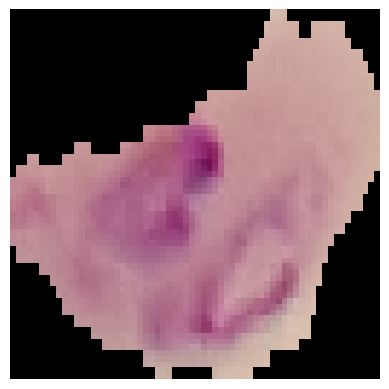

In [ ]:
# Plotting an example of a parsitized cell and corresponding color intensities
parasitized_images = [i for i in os.listdir(f'{train_directory}/{categories[0]}') ] # parasitized
parasitized_img = np.random.choice(parasitized_images, 1, replace = False)
parasitized_im = f'{train_directory}/{categories[0]}/{parasitized_img[0]}'
parasitized_img = load_img(parasitized_im, target_size = (64, 64))
plt.imshow(parasitized_img)
plt.axis('off')
plt.show()

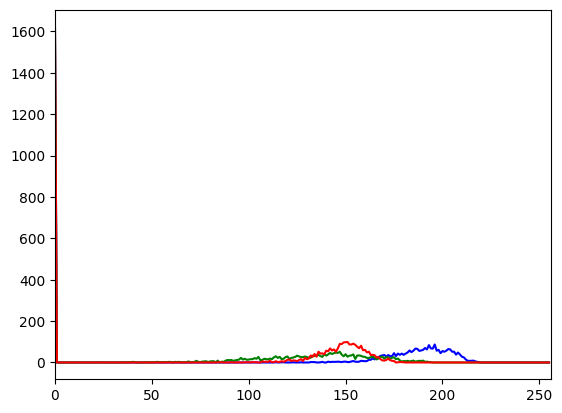

In [ ]:
# Plotting color intensities for an example of a parsitized cell
parasitized_img = np.array(parasitized_img)
assert parasitized_img is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([parasitized_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

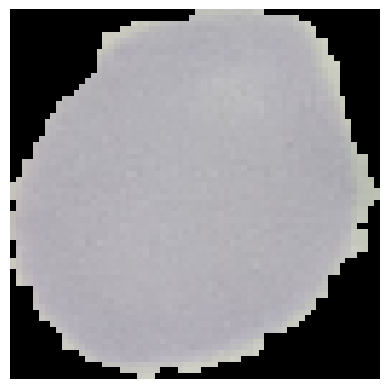

In [ ]:
# Plotting an example of an uninfected cell and corresponding color intensities
uninfected_images = [fn for fn in os.listdir(f'{train_directory}/{categories[1]}') ] # uninfected
uninfected_img = np.random.choice(uninfected_images, 1, replace = False)
uninfected_im = f'{train_directory}/{categories[1]}/{uninfected_img[0]}'
uninfected_img = load_img(uninfected_im, target_size = (64, 64))
plt.imshow(uninfected_img)
plt.axis('off')
plt.show()

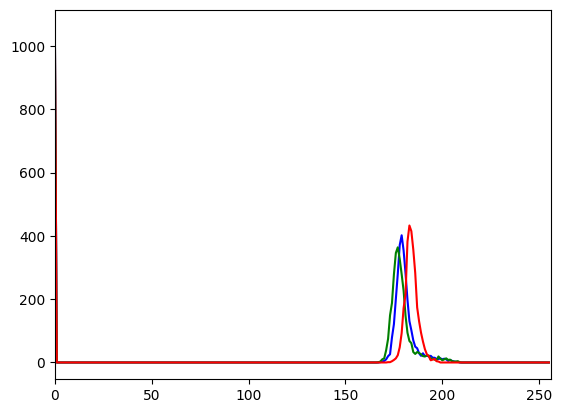

In [ ]:
# Plotting color intensities for an example of an uninfected cell

uninfected_img = np.array(uninfected_img)
assert uninfected_img is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([uninfected_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### <div class="alert alert-info">Observations and insights:<br><font size='2'>From the above exploration on ranges of pixel values for train and test images, we see that values from both sets range from 0 - 255 overall for minimum and maximum values respectively, and the mean values at 119.94 and 115.25 for training and testing sets respectively. We also see variations in the distribution of Red, Green and Blue color intensities between these datasets. Additionally, plotted above are histograms that show color channels (blue, green, and red) for examples of parasitized and uninfected images. We see that the parasitized cell has more variable and different intesity values for red, green and blue color channels, while the uninfected cell seems to have these three colors almost at the same intensity (for various tested images), in other words, a relative balanced distribution in color intesity. It would be interesting to see what more of the images look like per class and the means across the entire dataset. </font></div>



###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# Computing number of uninfected and parasitized cells in both training and testing sets

print('-'*20, "Total number of uninfected cells:", '-'*20,)
print('Number of cells in y_train =', sum(y_train=='uninfected'), '\nNumber of cells in y_test =', sum(y_test=='uninfected'), "\nTotal Uninfected Cells =", sum(y_train=='uninfected') + sum(y_test=='uninfected'), '\n')

print('-'*20, "Total number of parasitized cells:", '-'*20,)
print('Number of cells in y_train =', sum(y_train=='parasitized'), '\nNumber of cells in y_test =', sum(y_test=='parasitized'), "\nTotal Parasitized Cells =", sum(y_train=='parasitized') + sum(y_test=='parasitized'), '\n')


-------------------- Total number of uninfected cells: --------------------
Number of cells in y_train = 12376 
Number of cells in y_test = 1300 
Total Uninfected Cells = 13676 

-------------------- Total number of parasitized cells: --------------------
Number of cells in y_train = 12582 
Number of cells in y_test = 1300 
Total Parasitized Cells = 13882 



### <font color='#19597C'><font size='4'><i>Splitting the Data using a 80:20 ratio:</i></font>

Based on the dimensions of the datasets we have seen above, we can see that the train set is almost more than 9 fold the test dataset as shown below:

In [ ]:
print("Number of images in training set:",X_train.shape[0])
print("Number of images in testing set:", X_test.shape[0])

Number of images in training set: 24958
Number of images in testing set: 2600


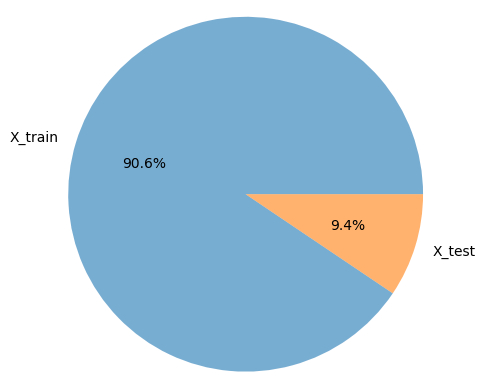

In [ ]:
nCells_X_train = pd.DataFrame(
    {"ds": ['X_train'],'nCells': [24958]},
    index=[0])

nCells_X_test = pd.DataFrame(
    {"ds": ['X_test'],'nCells': [2600]},
    index=[0])

datasets = [nCells_X_train, nCells_X_test]
datasets_concat = pd.concat(datasets)
#adding colors
colors = sns.color_palette()[0:2] #https://seaborn.pydata.org/generated/seaborn.color_palette.html
#colors = sns.color_palette('pastel')[0:2]
plt.pie(datasets_concat.nCells, colors = colors, wedgeprops={"alpha": 0.6}, autopct = '%.1f%%', radius = 1.2, labels = ['X_train', 'X_test'])
plt.show()

<div class="alert alert-info"><font size='2'>We can see from the above pie chart that the training set constitues about 90% of the data while the testing set constitutes close to 10%. In the next section, I will be re-splitting the data so that 80% of the observations be used for training and the remaining 20% be used for testing to produce optimal results, however, this is not always the case especially with very few observations. </font></div>

In [ ]:
merger_X = np.r_[X_train, X_test]
merger_y = np.r_[y_train, y_test]

X_train, X_test, y_train, y_test = train_test_split(merger_X, merger_y, test_size=0.2, random_state=42)
# The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing.
print("Number of images in training set:",X_train.shape[0])
print("Number of images in testing set:", X_test.shape[0])

Number of images in training set: 22046
Number of images in testing set: 5512


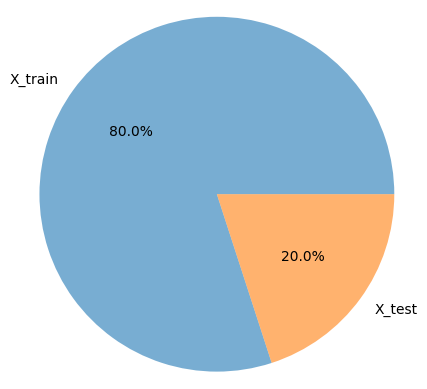

In [ ]:
nCells_X_train = pd.DataFrame(
    {"ds": ['X_train'],'nCells': [22046]},
    index=[0])

nCells_X_test = pd.DataFrame(
    {"ds": ['X_test'],'nCells': [5512]},
    index=[0])

datasets = [nCells_X_train, nCells_X_test]
datasets_concat = pd.concat(datasets)
#adding colors
colors = sns.color_palette()[0:2] #https://seaborn.pydata.org/generated/seaborn.color_palette.html
#colors = sns.color_palette('pastel')[0:2]
plt.pie(datasets_concat.nCells, colors = colors, wedgeprops={"alpha": 0.6}, autopct = '%.1f%%', radius = 1.2, labels = ['X_train', 'X_test'])
plt.show()

<div class="alert alert-info"><font size='2'>The data we'll be using downstream and henceforth are now split based on a 80:20 ratio for taining and testing respectively and as shown above.</font></div>

###<b>Normalize the images

In [ ]:
# Since the image pixel values range from 0-255, the data will be normalized by scaling -
# we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.
# Normalizing the image pixel values:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

# Checking ranges of pixel values after normalization
print('-'*20, "Pixel values after normalization", '-'*20,)
print("Training set:")
print("Minimum pixel value after normalization:", np.amin(X_train))
print("Mean pixel value after normalization:", np.round(np.mean(X_train),2))
print("Maximum pixel value after normalization:", np.amax(X_train), '\n')

print("Testing set:")
print("Minimum pixel value after normalization:", np.amin(X_test))
print("Mean pixel value after normalization:", np.round(np.mean(X_test),2))
print("Maximum pixel value after normalization:", np.amax(X_test))

-------------------- Pixel values after normalization --------------------
Training set:
Minimum pixel value after normalization: 0.0
Mean pixel value after normalization: 0.47
Maximum pixel value after normalization: 1.0 

Testing set:
Minimum pixel value after normalization: 0.0
Mean pixel value after normalization: 0.47
Maximum pixel value after normalization: 1.0


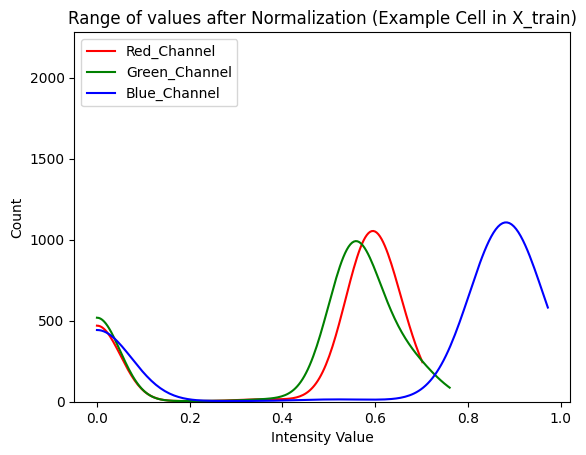

In [ ]:
# Visualizing range of normalized values
img = X_train[0]
ax1 = sns.histplot(img[:, :, 0].ravel(), color = 'white', alpha = 0.2, kde=True, edgecolor='white') # using .ravel() here to return a flattened array for plotting
ax1.lines[0].set_color('red')

ax2 = sns.histplot(img[:, :, 1].ravel(),  color = 'white', alpha = 0.2, kde=True, edgecolor='white')
ax2.lines[1].set_color('green')

ax3 = sns.histplot(img[:, :, 2].ravel(),  color = 'white', alpha = 0.2, kde=True, edgecolor='white')
ax3.lines[2].set_color('blue')

plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.title('Range of values after Normalization (Example Cell in X_train)')
plt.show()

#### <div class="alert alert-info">Observations and insights:<br><font size='2'>Normalization is an important preprocessing step of data that will be used as inputs into our neural networks. Besides allowing for faster training, normalization also reduces the chances of getting stuck at local optima. Secondly, weight decay and estimation can be done more conveniently with normalized inputs, overall avoiding exploding gradient problems which occur when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes models unstable and unable to learn from the training data - we therefore don't want very high or very low values. Before normalization, we saw that color intensity values of the pixels ranged between 0-255. From the histograms of the color images, we also saw these same ranges (0-255) in the plots. The data were normalized to range between 0 and 1 which gave us values such as min, mean and max as 0, 0.47, 1 for the training and testing sets. Overall we want each pixel to have a similar distribution which ultimately makes convergence faster when training our networks. From the plot above of the first image in the training set, we can also see that the pixel intensity values (x-axis) now range between 0 and 1.</font></div>

###<b> Plot to check if the data is balanced

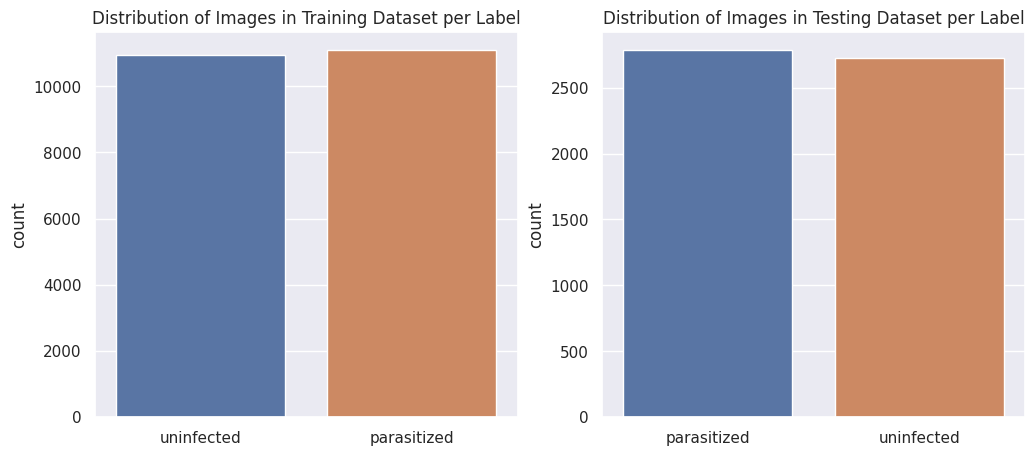

In [ ]:
# Checking to see if the data is balanced
sns.set(rc={"figure.figsize":(12, 5)}) # setting plot size
fig, axs = plt.subplots(ncols=2)
sns.countplot(x=y_train,  ax=axs[0]).set(title='Distribution of Images in Training Dataset per Label')
sns.countplot(x=y_test,  ax=axs[1]).set(title='Distribution of Images in Testing Dataset per Label')
plt.show()

parasitized    11095
uninfected     10951
Name: Label, dtype: int64
parasitized    2787
uninfected     2725
Name: Label, dtype: int64


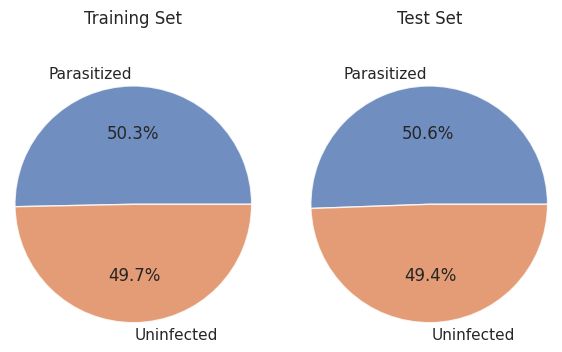

In [ ]:
# Checking balance in datasets using pie chats
colors = sns.color_palette()[0:2] #https://seaborn.pydata.org/generated/seaborn.color_palette.html

# Converting the lists into DataFrames
y_train_1 = pd.DataFrame(y_train, columns = ["Label"], dtype = object)
y_test_1 = pd.DataFrame(y_test, columns = ["Label"], dtype = object)
#y_train_1.head()
counts = y_train_1.Label.value_counts()
print(counts)

counts = y_test_1.Label.value_counts()
print(counts)

sns.set(rc={"figure.figsize":(7, 4)})
fig, axs = plt.subplots(ncols=2)
axs[0].pie(y_train_1.value_counts(), colors = colors, wedgeprops={"alpha": 0.8}, autopct = '%.1f%%', radius = 1.2, labels = ['Parasitized', 'Uninfected'])
axs[1].pie(y_test_1.value_counts(), colors = colors, wedgeprops={"alpha": 0.8}, autopct = '%.1f%%', radius = 1.2, labels = ['Parasitized', 'Uninfected'])

axs[0].set_title('Training Set', y=1.2)
axs[1].set_title('Test Set', y=1.2)

plt.show()

In [ ]:
# Computing number of uninfected and parasitized cells in both training and testing sets after re-splitting the datasets

print('-'*20, "Total number of uninfected cells:", '-'*20,)
print('Number of cells in y_train =', sum(y_train=='uninfected'), '\nNumber of cells in y_test =', sum(y_test=='uninfected'), "\nTotal Uninfected Cells =", sum(y_train=='uninfected') + sum(y_test=='uninfected'), '\n')

print('-'*20, "Total number of parasitized cells:", '-'*20,)
print('Number of cells in y_train =', sum(y_train=='parasitized'), '\nNumber of cells in y_test =', sum(y_test=='parasitized'), "\nTotal Parasitized Cells =", sum(y_train=='parasitized') + sum(y_test=='parasitized'), '\n')


-------------------- Total number of uninfected cells: --------------------
Number of cells in y_train = 10951 
Number of cells in y_test = 2725 
Total Uninfected Cells = 13676 

-------------------- Total number of parasitized cells: --------------------
Number of cells in y_train = 11095 
Number of cells in y_test = 2787 
Total Parasitized Cells = 13882 



#### <div class="alert alert-info">Observations and insights:<br><font size='2'>We can see from the above plots that the datasets are nicely balanced with each category/label having roughly the same number of images (~50% in both categories) as seen from both the pie and countplots. We expect accuracy to be a good evaluation metric for model performance in this case. Cell enumerations per class and dataset:

* Total number of uninfected cells in y_train = 10950
* Total number of parasitized cells in y_train = 11096
* Total number of uninfected cells in y_test = 2726
* Total number of parasitized cells in y_test = 2786 </font></div>

### <b>Data Exploration</b>
Let's visualize the images from the train data

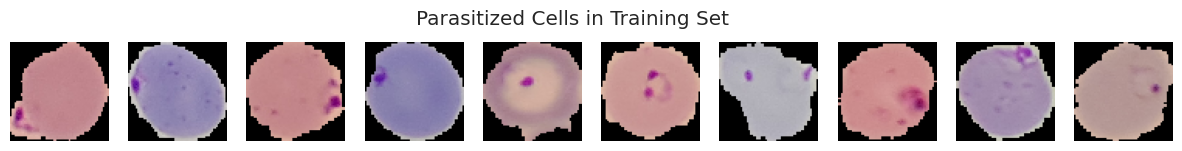

In [ ]:
# Visualizing parasitized images from the training data
parasitized_images = [img for img in os.listdir(f'{train_directory}/{categories[0]}') ] #parasitized
parasitized_image = np.random.choice(parasitized_images, 10, replace = False)

fig = plt.figure(figsize = (15, 4))
plt.suptitle("Parasitized Cells in Training Set", y=0.7)

for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1)
    images = f'{train_directory}/{categories[0]}/{parasitized_image[i]}'
    img = load_img(images, target_size = (64, 64))
    plt.imshow(img)
    plt.axis('off')
plt.show()

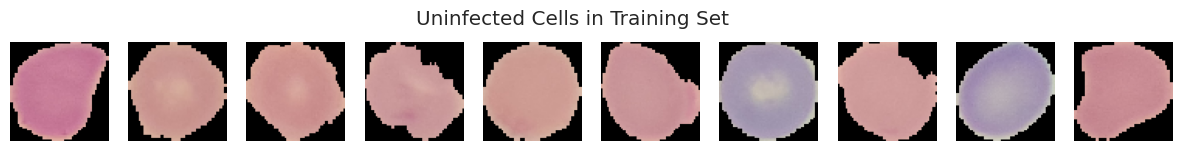

In [ ]:
# Visualizing uninfected images from the training data
uninfected_images = [img for img in os.listdir(f'{train_directory}/{categories[1]}') ] #uninfected
uninfected_image = np.random.choice(uninfected_images, 10, replace = False)

fig = plt.figure(figsize = (15, 4))
plt.suptitle("Uninfected Cells in Training Set", y=0.7)

for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1)
    images = f'{train_directory}/{categories[1]}/{uninfected_image[i]}'
    img = load_img(images, target_size = (64, 64))
    plt.imshow(img)
    plt.axis('off')
plt.show()

#### <div class="alert alert-info">Observations and insights:<br><font size='2'>Shown above are examples of some images from the training set for both parasitized and uninfected cells respectively. As we can see and as earlier observed, the images in both datasets have some differences. In previous sections we saw that the imported images varied in size. Resizing images is a critical preprocessing step in computer vision to allow our CNNs work with these images. We accounted for this during the data preparation phase where the images were resized, cropping them from the center to enforce the same size. Ideally we also want our input images to be smaller as these are much faster and easier for the CNNs to train. Input images that are twice as large require our networks to learn from n-times as many pixels which increases the computational complexity. Many deep learning model architectures require that our images are of the same size and as we saw, our raw unzipped images varied in size. Having catered for image size variances, we still see more orientation and morphological differences in cells from these datasets. We see structural and color differences where the parasitized cells seem to have high intensity color patches in some areas of the cells compared to the uninfected cells. To allow our models learn various patterns and to be more robust, we'll make them invariant to image transitions or orientations using data augmentation as we shall see in subsequent sections.</font></div>

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

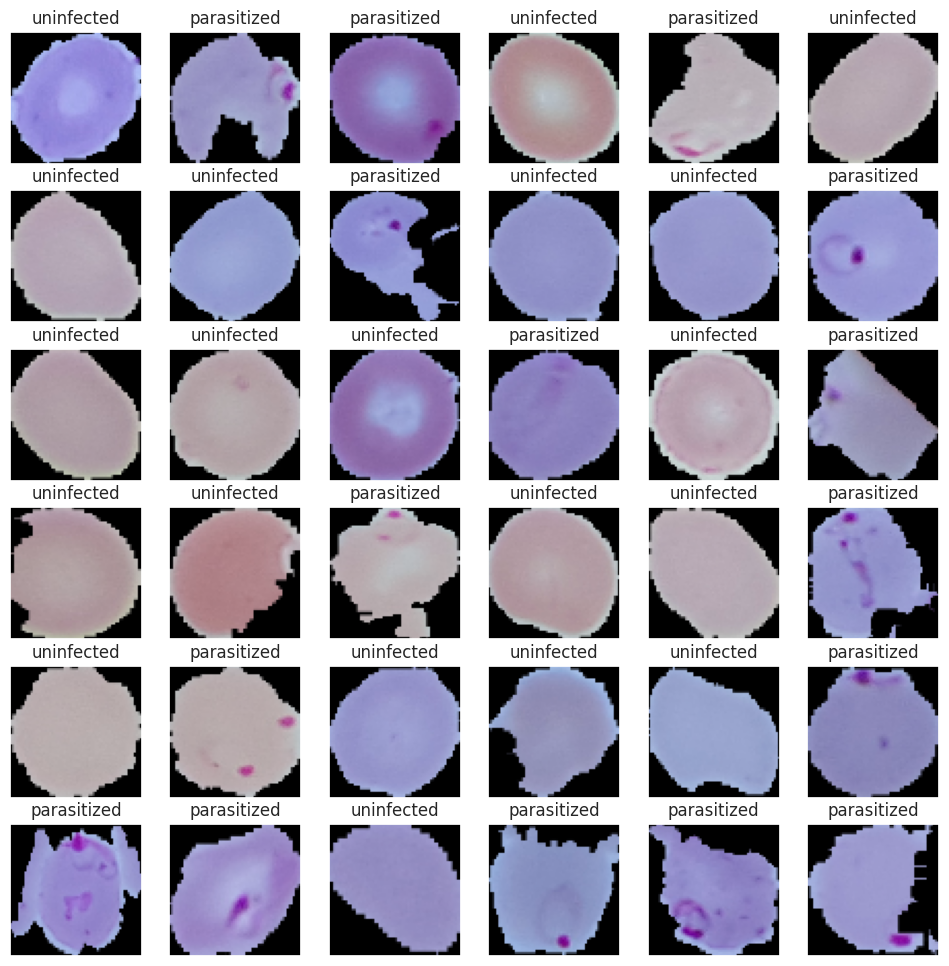

In [ ]:
# Using X_train to visualize the images with subplot(6, 6) and figsize = (12, 12)
class_names_list = ['parasitized', 'uninfected']

plt.figure(figsize = (12, 12)) # Defining the plot size to 12x12 (width x height)

for i in range(36):
    plt.subplot(6, 6, i + 1) # Adding a subplot wrapper to dictate the plot behaviour and visualization.
    # In this case the figure will be represented as a 6x6 grid and axes are specified by the set position
    # Turning off plot axis ticks and making grid lines invisible
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i]) # plotting the images - using default cmap
    plt.title(y_train[i])
plt.show()

#### <div class="alert alert-info">Observations and insights:<br><font size='2'>From the above cell-image panel, and as earlier mentioned, we can see that the images are of the same size. It's key to reiterate that there are visual differences between the parasitized and uninfected cells, particularly differences in color intensities and shape to some extent. For the parasitized cells, we see some darker images while some parasitized cells are much lighter, however majority distinctively seem to have higher color intensity patches in certain parts of the cell, a characteristic we barely see in the uninfected cells. Most of the uninfected cells have a uniform color intensity with no high intensity patches as seen in the parasitized cells. It's also key to note that some uninfected cells (as seen for the parasitized cells) are darker than the others. It would be interesting to consider the fact that these cells could be at different stages of infection or disease progression that would explain these variations. Besides color intensities, we see differences in cell morphologies, from shapes, structures or forms, to image orientations. Some of these characteristics will need to be factored in in our analyses downstream as these differences (in shapes, size, image orientation) often represent a challenge for most CNN architectures. To allow our models learn various patterns despite these differences, and to make them more robust, we'll make them invariant to image transitions or orientations using data augmentation as we shall see in subsequent sections of this notebook.</font></div>

###<b> Plotting the mean images for parasitized and uninfected

<b> Mean image for parasitized

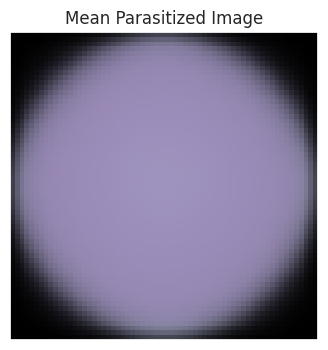

In [ ]:
# Plotting mean image of parasitized cells
parasitized_data = []  # Creating list to store the parasitized cells

for image, label in zip(X_train, y_train): #loop over evey image and label pair in the respective datasets

        if label == "parasitized": # check if the label or cell image is parasitized

              parasitized_data.append([image]) #if the condition is met, that is, image is parasitized, then append image to list container

#plot mean image
plt.imshow(np.mean(parasitized_data, axis=0)[0])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title("Mean Parasitized Image")
plt.show()

<b> Mean image for uninfected

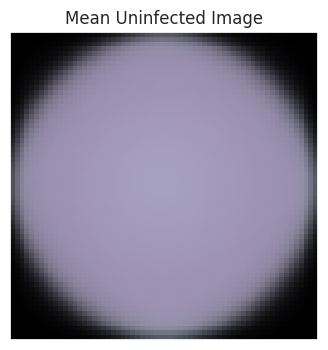

In [ ]:
# Plotting mean image of uninfected cells
uninfected_cells = []  # Creating list to store the parasitized cells

for image, label in zip(X_train, y_train): #loop over evey image and label pair in the respective datasets

        if label == "uninfected": # check if the label or cell image is uninfected

              uninfected_cells.append([image]) #if the condition is met, that is, image is uninfected, then append image to list container

#plot mean image
plt.imshow(np.mean(uninfected_cells, axis=0)[0])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title("Mean Uninfected Image")
plt.show()

#### <div class="alert alert-info">Observations and insights:<br><font size='2'>The mean images of both uninfected and parasitized cells seem to take on a some what similar shape. As we know from biology, some cells are round, while others are spherical or elongated. In this case, majority of our cells are round (with some having less round edges). On average, there isn't a strong variance between the color intensities of cells from both these classes (based on the means), however, we see that the uninfected cells are slightly lighter than the parasitized cells, which may be interesting information to factor in in our CNN models.</font></div>

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

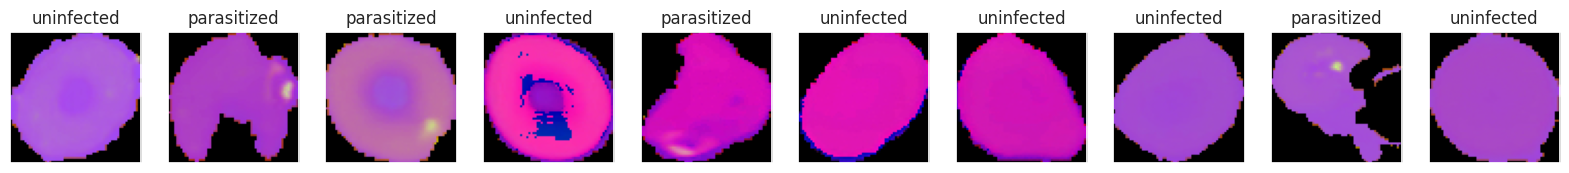

In [ ]:
# Converting images in the training set from rgb to the hsv color space

# matplotlib.colors.rgb_to_hsv can be used to convert float RGB values (in the range [0, 1]), in a numpy array to HSV values
# HSV (Hue Saturation Value) is a color scale that provides a numerical readout of our images that corresponds to the colors contained therein.
# Hue is measured in degrees from 0 to 360
# #https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
# This conversion can also be done using cv2.cvtColor

X_train_hsv = matplotlib.colors.rgb_to_hsv(X_train)

class_names_list = ['parasitized', 'uninfected']

plt.figure(figsize = (20, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_hsv[i], cmap = plt.cm.binary)
    plt.title(y_train[i])
plt.show()

###<b> Converting the test data

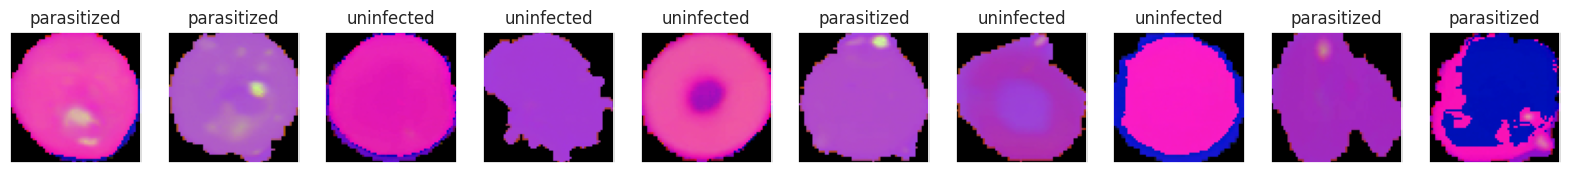

In [ ]:
# Converting images in the test set from rgb to the hsv color space
X_test_hsv = matplotlib.colors.rgb_to_hsv(X_test)

class_names_list = ['parasitized', 'uninfected']

plt.figure(figsize = (20, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_hsv[i], cmap = plt.cm.binary)
    plt.title(y_test[i])
plt.show()

#### <div class="alert alert-info">Observations and insights:<br><font size='2'>With most image processing challenges, color image segmentation is a topic of interest as color allows for more reliable segmentation of images than we would see from gray scale images. The HSV (Hue Saturation Value) color space unlike the RGB (Red, Green and Blue) color scheme, explains the predominant color (hue), the purity of the color (saturation) and the brilliance of the color (luminance) which is more ideal for dealing with image segmentation, including segmentation of noisy color images. In the above sections, the images in both training and testing sets were converted to the HSV color space from the RGB color space. We can see some differences in these images compared to the previous images we saw, largely seeing more segregation by intensity and some structures in the cells that we hadn’t seen earlier. We also see some uninfected cells that tend to somwhat similar color intensities seen in the parasitized cells. It will be interesting to see how we can leverage this new information, and whether these different color intensities we see can improve our predictions.</font></div>

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

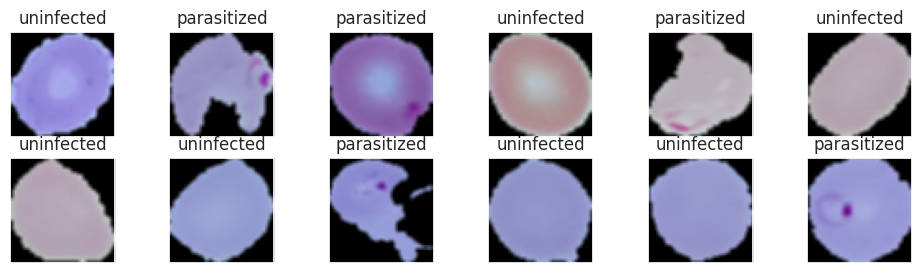

In [ ]:
# Applying Gaussian Blurring to smoothen and reduce noise in the training data

for i in range(X_train.shape[0]):
  X_train_blur = cv2.GaussianBlur(X_train[i], (3, 3), cv2.BORDER_DEFAULT) # Gaussian kernel size set [height width] = 3x3 for ksize.width and ksize.height respectively
  # kernel size can differ but they both must be positive and odd. Or, they can be zero’s and then computed from sigma* (Kernel standard deviation along X/Y-axis).
  # borderType here is set to cv2.BORDER_DEFAULT, other examples set it to 0

# Creating a function "generate_blur_data()" to created blured images
X_train_blur = []

# Storing all the testing images
def generate_blur_data():
  for i in range(X_train.shape[0]):
    x = cv2.GaussianBlur(X_train[i], (3, 3), cv2.BORDER_DEFAULT)
    X_train_blur.append(x) # Appending both the images and labels

generate_blur_data()

X_train_blur = np.array(X_train_blur) # converting our list of gausing blurred images to a numpy array

# Next, I plot the first 12 blured images
plt.figure(figsize = (12, 3)) # Specifying image size to 12x3 for width and height respectively

for i in range(12): # intetested in ploting the first 12 images
    plt.subplot(2, 6, i + 1) # Adding subplot wrapper to dictate the plot behaviour and viz.
    # In this case the figure will be represented as a 2x6 grid and axes are specified by the set position
    plt.xticks([]) # turning off xticks
    plt.yticks([]) # turning off yticks
    plt.grid(False) # turning off grid lines/or making them invisible
    plt.imshow(X_train_blur[i]) # plotting the ith image in range 1-12
    plt.title(y_train[i]) # adding corresponding image labels
plt.show()

# Refs on gaussian blurring
#https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/
#https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#gaussianblur


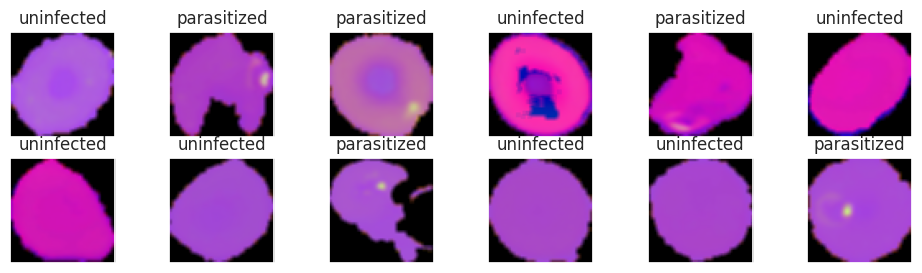

In [ ]:
# Applying Gaussian Blurring to smoothen and reduce noise in the training data - blurring images that were converted to hsv and keeping a copy of this should I need it downstream

# For each image in the training set that has been converted to the hsv (Hue Saturation Value) color scale,
# I blur and save each image in X_train_hsv_blur

for i in range(X_train_hsv.shape[0]):
  X_train_hsv_blur = cv2.GaussianBlur(X_train_hsv[i], (3, 3), cv2.BORDER_DEFAULT) # Gaussian kernel size set [height width] = 3x3 for ksize.width and ksize.height respectively
  # kernel size can differ but they both must be positive and odd. Or, they can be zero’s and then computed from sigma* (Kernel standard deviation along X/Y-axis).
  # borderType here is set to cv2.BORDER_DEFAULT, other examples set it to 0

# Here we will be using a user defined function "generate_blur_data()" to extract the images from the directory
X_train_hsv_blur = []

# Storing all the testing images
def generate_blur_data():
  for i in range(X_train_hsv.shape[0]):
    x = cv2.GaussianBlur(X_train_hsv[i], (3, 3), cv2.BORDER_DEFAULT)
    X_train_hsv_blur.append(x) # Appending both the images and labels

generate_blur_data()

X_train_hsv_blur = np.array(X_train_hsv_blur) # converting our list of hsv and gausing blurred images to a numpy array

# Next, I plot the first 12 blured images
plt.figure(figsize = (12, 3)) # Specifiying image size to 12x3 for width and height respectively

for i in range(12): # intetested in ploting the first 12 images
    plt.subplot(2, 6, i + 1) # Adding subplot wrapper to dictate the plot behaviour and visualization.
    # In this case the figure will be represented as a 2x6 grid and axes are specified by the set position
    plt.xticks([]) # turning off xticks
    plt.yticks([]) # turning off yticks
    plt.grid(False) # turning off grid lines/or making them invisible
    plt.imshow(X_train_hsv_blur[i]) # plotting the ith image in range 1-12
    plt.title(y_train[i]) # adding corresponding image labels
plt.show()

###<b> Gaussian Blurring on test data

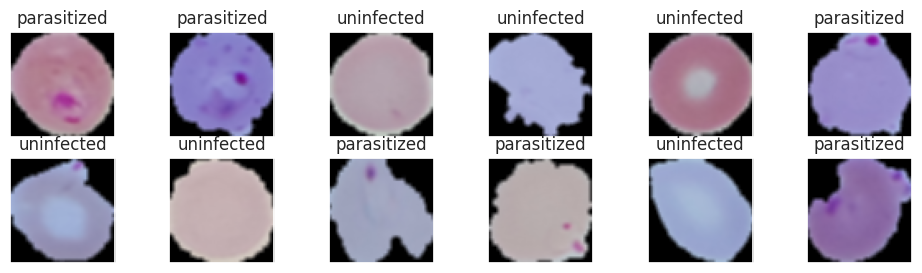

In [ ]:
# Applying Gaussian Blurring to smoothen and reduce noise in the testing data

for i in range(X_test.shape[0]):
  X_test_blur = cv2.GaussianBlur(X_test[i], (3, 3), cv2.BORDER_DEFAULT) # Gaussian kernel size set [height width] = 3x3 for ksize.width and ksize.height respectively
  # kernel size can differ but they both must be positive and odd. Or, they can be zero’s and then computed from sigma* (Kernel standard deviation along X/Y-axis).
  # borderType here is set to cv2.BORDER_DEFAULT, other examples set it to 0

# Creating a function "generate_blur_data()" to created blured images
X_test_blur = []

# Storing all the testing images
def generate_blur_data():
  for i in range(X_test.shape[0]):
    x = cv2.GaussianBlur(X_test[i], (3, 3), cv2.BORDER_DEFAULT)
    X_test_blur.append(x) # Appending both the images and labels

generate_blur_data()

X_test_blur = np.array(X_test_blur) # converting our list of gausing blurred images to a numpy array

# Next, I plot the first 12 blured images
plt.figure(figsize = (12, 3)) # Specifiying image size to 12x3 for width and height respectively

for i in range(12): # intetested in ploting the first 12 images
    plt.subplot(2, 6, i + 1) # Adding subplot wrapper to dictate the plot behaviour and visualization.
    # In this case the figure will be represented as a 2x6 grid and axes are specified by the set position
    plt.xticks([]) # turning off xticks
    plt.yticks([]) # turning off yticks
    plt.grid(False) # turning off grid lines/or making them invisible
    plt.imshow(X_test_blur[i]) # plotting the ith image in range 1-12
    plt.title(y_test[i]) # adding corresponding image labels
plt.show()

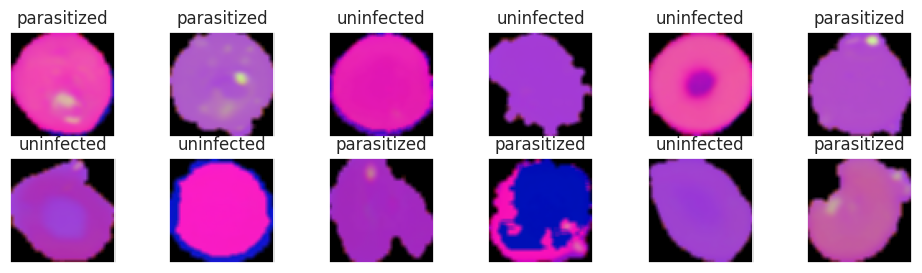

In [ ]:
# Applying Gaussian Blurring to smoothen and reduce noise in the testing data - blurring images that were converted to hsv and keeping a copy of this should I need it downstream

# For each image in the test set that has been converted to the hsv (Hue Saturation Value) color scale,
# I blur and save each image in X_test_hsv_blur'

for i in range(X_test_hsv.shape[0]):
  X_test_hsv_blur = cv2.GaussianBlur(X_test_hsv[i], (3, 3), cv2.BORDER_DEFAULT) # Gaussian kernel size set [height width] = 3x3 for ksize.width and ksize.height respectively
  # kernel size can differ but they both must be positive and odd. Or, they can be zero’s and then computed from sigma* (Kernel standard deviation along X/Y-axis).
  # borderType here is set to cv2.BORDER_DEFAULT, other examples set it to 0

# Creating a function "generate_blur_data()" to created blured images
X_test_hsv_blur = []

# Storing all the testing images
def generate_blur_data():
  for i in range(X_test_hsv.shape[0]):
    x = cv2.GaussianBlur(X_test_hsv[i], (3, 3), cv2.BORDER_DEFAULT)
    X_test_hsv_blur.append(x) # Appending both the images and labels

generate_blur_data()

X_test_hsv_blur = np.array(X_test_hsv_blur) # converting our list of hsv and gausing blurred images to a numpy array

# Next, I plot the first 12 blured images
plt.figure(figsize = (12, 3)) # Specifiying image size to 12x3 for width and height respectively

for i in range(12): # intetested in ploting the first 12 images
    plt.subplot(2, 6, i + 1) # Adding subplot wrapper to dictate the plot behaviour and visualization.
    # In this case the figure will be represented as a 2x6 grid and axes are specified by the set position
    plt.xticks([]) # turning off xticks
    plt.yticks([]) # turning off yticks
    plt.grid(False) # turning off grid lines/ making them invisible
    plt.imshow(X_test_hsv_blur[i]) # plotting the ith image in range 1-12
    plt.title(y_test[i]) # adding corresponding image labels
plt.show()

#### <div class="alert alert-info">Observations and insights:<br><font size='2'>Gaussian blurring is used in image preprocessing to smoothen and reduce the amount of noise within an image, including removing speckles and negligible details in an image. This feature (Gaussian blur) is obtained by blurring (smoothing) an image using a Gaussian function that can be considered as a low-pass filter that preserves spatial frequencies while reducing noise. Focusing on the visual effects that blurring might have applied to our data, we see some clearer contrasts in color intesities within the images to which gaussian filtering has been applied. As images come in different forms: some more clearer than others, differences in contrasts, good vs poor qualify, some more noisy than others, this can also be seen as an image augmentation technique to allow our neural networks learn from data given all these possible variations or differences. This could still help our classification problem to pick up these nuances in image representation. We shall also try augmenting the data. </font></div>

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import losses, optimizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import backend
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Fixing seed for random number generators - this aids reproducibility of these results each time this code is run.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Setting callable variable to clear keras backend
clear_backend = backend.clear_session()
clear_backend

####<B>One Hot Encoding on the train and test labels

In [ ]:
# Creating one-hot encoded representation of target labels
# We can do this by using tensorflow's utility function: to_categorical()

# Given we are working with a binary classification problem, the output layer should have 2 neurons, which will provide us with the
# probabilities of the input image belonging to each of the 2 classes, 'parasitized' or 'uninfected'
# As thus, we need to create a one-hot encoded representation for the target classes (encodes or transforms the data into either 0 or 1).

# For this I will encode all train and test set labels using the LabelEncoder function then apply the "to_categorical" function to represent the data.
encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

y_train = to_categorical(y_train, 2) # setting number of classes to 2 as we have 2 classes or labels
y_test = to_categorical(y_test, 2)

print('-'*20,  "Encoded Training Data", '-'*20)
print(y_train, "\n")
print('-'*20,  "Encoded Testing Data", '-'*20)
print(y_test)

# Saving copies of datasets given various upcoming transitions that may require recalling preprocessed base datasets
X_train_alpha = X_train
X_test_alpha = X_test

y_train_alpha = y_train
y_test_alpha = y_test

-------------------- Encoded Training Data --------------------
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]] 

-------------------- Encoded Testing Data --------------------
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


###<b> Building the model
Using 'sigmoid' as the activation function in the output layer

In [ ]:
# Creating copies of datasets to run as needed
X_train_sig = X_train
X_test_sig = X_test

# Reshaping labels to be used in this model
y_train_sig = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test_sig = np.asarray(y_test).astype('float32').reshape((-1,1))

# Building CNN model architecture:
# Base reference model - Later, I will tweak the model architecture to see whether we can improve its performance
def cnn_model_alpha_sigmoid():
    model = Sequential([ #Intializing sequential model
                        # Adding first convolutional layer with 64 filters and the kernel size of 2x2.
                        # Using the 'same' padding, activation function as "relu" and providing the input shape = (64, 64, 3)
                        Conv2D(64, (2, 2), padding = "same", activation = "relu", input_shape = (64, 64, 3)),
                        # Adding a second Convolutional layer with 128 filters and the kernel size of 2x2 with 'same' padding and activation function as "relu"
                        Conv2D(128, (2, 2), padding = "same", activation = "relu"),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Flattening the output from the previous layer
                        Flatten(),
                        # Adding a dense layer with 512 nodes
                        Dense(512, activation = "relu"),
                        # Adding a dropout layer with the rate equal to 0.4
                        Dropout(0.4),
                        # Adding final dense layer with 1 node and activation function as sigmoid to compute class probabilities
                        Dense(1, activation = "sigmoid") # 1 represents the output layer neuron
                        ])
    return model

###<b> Compiling the model

In [ ]:
# Building and compiling the model
# Using Adam optimizer
# optimizer = Adam(learning_rate = 0.001) - no improvement

optimizer = 'adam' # running without setting running rate

# Building the model
cnn_modelAlpha_Sig = cnn_model_alpha_sigmoid()

# Compiling the model with the loss equal to binary_crossentropy, and metric equal to 'accuracy'
cnn_modelAlpha_Sig.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Generating and printing the summary of the model
cnn_modelAlpha_Sig.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       32896     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                        

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

# Callbacks can also be specified using ReduceLROnPlateau from keras.callbacks
# Example usage:
# reduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=0.00001...)

<b> Fit and train our Model

In [ ]:
# Fitting the model with set parameters
history_modelAlpha_Sig = cnn_modelAlpha_Sig.fit(X_train_sig, y_train_sig,
                                batch_size = 32,
                                callbacks = callbacks,
                                validation_split = 0.2,
                                epochs = 20,
                                verbose = 1)

Epoch 1/20
552/552 [==============================] - 26s 42ms/step - loss: 0.7154 - accuracy: 0.4955 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
552/552 [==============================] - 19s 34ms/step - loss: 0.6934 - accuracy: 0.4988 - val_loss: 0.6933 - val_accuracy: 0.4986
Epoch 3/20
552/552 [==============================] - 19s 34ms/step - loss: 0.6924 - accuracy: 0.5268 - val_loss: 0.6940 - val_accuracy: 0.4989


<b>Plot the train and validation accuracy

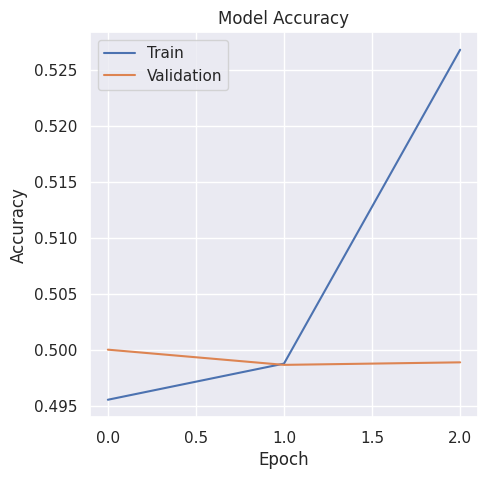

In [ ]:
# Plotting training and validation curves for this test model using sigmoid, below we shall plot the same using softmax to compare the two activation functions
# set the figure size
plt.figure(figsize = (5,5))
plt.plot(history_modelAlpha_Sig.history['accuracy'])
plt.plot(history_modelAlpha_Sig.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

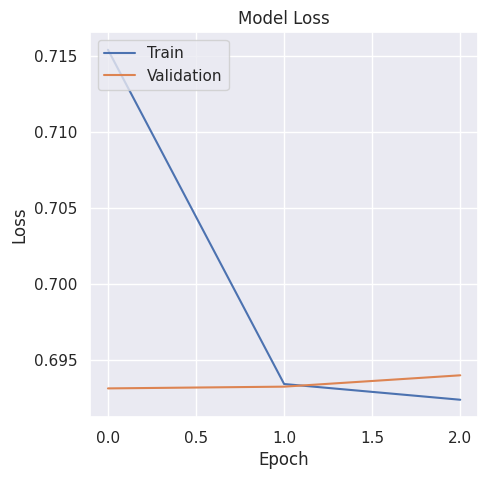

In [ ]:
# Plotting training and validation loss
plt.figure(figsize = (5,5))
plt.plot(history_modelAlpha_Sig.history['loss'])
plt.plot(history_modelAlpha_Sig.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


<div class="alert alert-info"><font size='2'>From the above accuracy plots, we see that the model is not performing well. Here I am using 'sigmoid' as the activation function and one output neuron in the output layer while using 'binary cross entropy' as the loss function. In the next run, I will apply 'softmax' as the activation function in the output layer with two neurons. The loss function applied will be 'categorical cross entropy'. All other parameters will remain the same or held constant to see how these three parameters affect model performance.</font></div>

### <b>Building the model
Using 'softmax' as the activation function in the output layer

In [ ]:
# Fixing seed for random number generators - this aids reproducibility of these results each time this code is run.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Setting callable variable to clear keras backend
clear_backend

In [ ]:
# Building CNN model architecture:
def cnn_model_alpha():
    model = Sequential([ #Intializing sequential model
                        # Adding first convolutional layer with 64 filters and the kernel size of 2x2.
                        # Using the 'same' padding, activation function as "relu" and providing the input shape = (64, 64, 3)
                        Conv2D(64, (2, 2), padding = "same", activation = "relu", input_shape = (64, 64, 3)),
                        # Adding a second Convolutional layer with 128 filters and the kernel size of 2x2 with 'same' padding and activation function as "relu"
                        Conv2D(128, (2, 2), padding = "same", activation = "relu"),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Flattening the output from the previous layer
                        Flatten(),
                        # Adding a dense layer with 512 nodes
                        Dense(512, activation = "relu"),
                        # Adding a dropout layer with the rate equal to 0.4
                        Dropout(0.4),
                        # Adding final dense layer with 2 nodes and activation function as softmax to compute class probabilities
                        Dense(2, activation = "softmax") # 2 represents output layer neurons for the 2 classes
                        ])
    return model

###<b> Compiling the model

In [ ]:
# Building and compiling the model
# Using Adam optimizer
# optimizer = Adam(learning_rate = 0.001)

optimizer = 'adam' # running without setting running rate

# Building the model
cnn_modelAlpha = cnn_model_alpha()

# Compiling the model with the loss equal to categorical_crossentropy, and metric equal to 'accuracy'
cnn_modelAlpha.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating and printing the summary of the model
cnn_modelAlpha.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 128)       32896     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_6 (Dense)             (None, 512)               67109376  
                                                      

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fitting the model with set parameters
history_modelAlpha = cnn_modelAlpha.fit(X_train, y_train,
                                batch_size = 32,
                                callbacks = callbacks,
                                validation_split = 0.2,
                                epochs = 20,
                                verbose = 1)

Epoch 1/20
552/552 [==============================] - 33s 57ms/step - loss: 0.5064 - accuracy: 0.7664 - val_loss: 0.2961 - val_accuracy: 0.8964
Epoch 2/20
552/552 [==============================] - 42s 77ms/step - loss: 0.2173 - accuracy: 0.9284 - val_loss: 0.2495 - val_accuracy: 0.9154
Epoch 3/20
552/552 [==============================] - 37s 67ms/step - loss: 0.1874 - accuracy: 0.9394 - val_loss: 0.2167 - val_accuracy: 0.9263
Epoch 4/20
552/552 [==============================] - 41s 74ms/step - loss: 0.1617 - accuracy: 0.9447 - val_loss: 0.1399 - val_accuracy: 0.9578
Epoch 5/20
552/552 [==============================] - 19s 34ms/step - loss: 0.1165 - accuracy: 0.9613 - val_loss: 0.1608 - val_accuracy: 0.9639
Epoch 6/20
552/552 [==============================] - 19s 34ms/step - loss: 0.1145 - accuracy: 0.9627 - val_loss: 0.1524 - val_accuracy: 0.9651


###<b> Evaluating the model on test data

In [ ]:
# Evaluating the model accuracy on the test data
accuracy = cnn_modelAlpha.evaluate(X_test, y_test, verbose = 2)
print(accuracy)
print('\n', 'Model accuracy on test set:', "{0:.2%}".format(accuracy[1],3))

173/173 - 1s - loss: 0.1175 - accuracy: 0.9650 - 1s/epoch - 7ms/step
[0.11753285676240921, 0.9649854898452759]

 Model accuracy on test set: 96.50%


<b> Plotting the confusion matrix

173/173 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2760
           1       0.95      0.98      0.97      2752

    accuracy                           0.96      5512
   macro avg       0.97      0.97      0.96      5512
weighted avg       0.97      0.96      0.96      5512



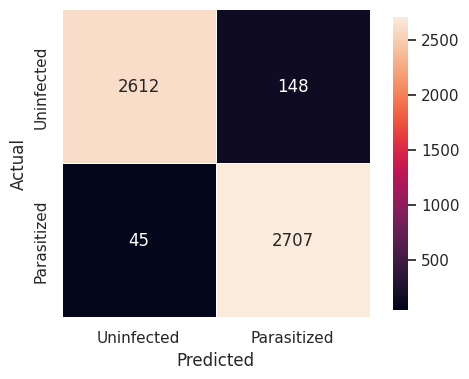

In [ ]:
# Converting each entry of y_test to a single label to obtain categorical values
y_predictions = cnn_modelAlpha.predict(X_test)
y_predictions = np.argmax(y_predictions, axis = 1)
y_test_arg = np.argmax(y_test, axis = 1)

# Printing the classification report
print(classification_report(y_test_arg, y_predictions))

# Plotting the Confusion Matrix using the confusion matrix() function which is also a predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_predictions)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax, xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'],
    cbar_kws={"shrink": .95})

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Checking some predictions
y_pred=cnn_modelAlpha.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

173/173 [==============================] - 1s 6ms/step


array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

In [ ]:
# Function to create Confusion Matrix with more necessary details
def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True,
                          xyplotlabels=True, sum_stats=True, figsize=None,cmap='Blues', title=None):

    # Text generator in each square
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # Generating summary stats
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # Creating visualization for heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cbar=cbar,xticklabels=categories,yticklabels=categories)

    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    if title:
        plt.title(title)

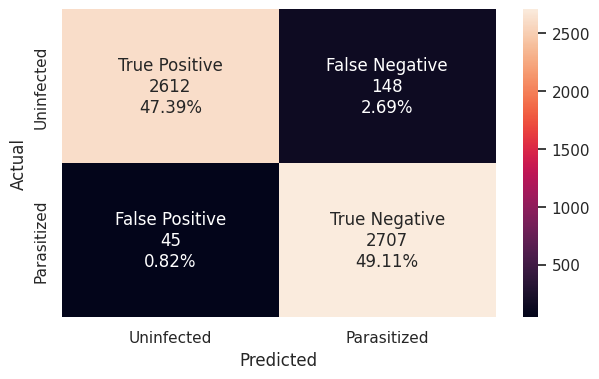

In [ ]:
from sklearn.metrics import confusion_matrix
# Plotting the Confusion Matrix using the confusion matrix() function which is also a predefined tensorflow module
# Calculating the confusion matrix
cm =confusion_matrix(y_test_arg, y_predictions)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Uninfected', 'Parasitized']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories)

<b>Plotting the train and validation curves

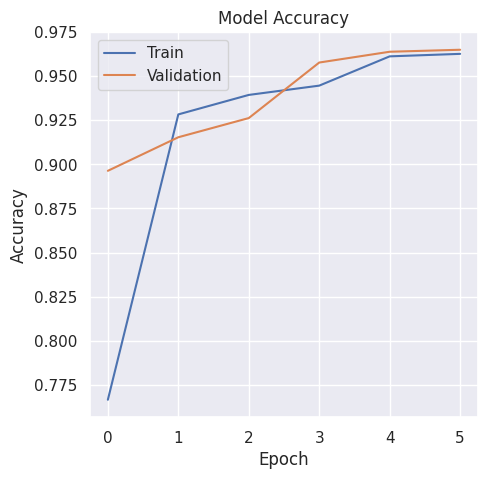

In [ ]:
# Plotting training and validation curves
# set the figure size
plt.figure(figsize = (5,5))
plt.plot(history_modelAlpha.history['accuracy'])
plt.plot(history_modelAlpha.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

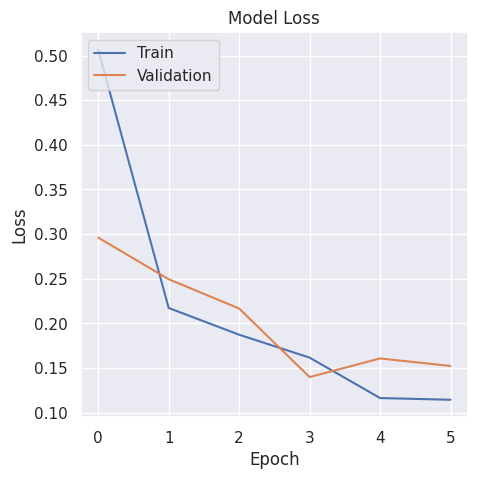

In [ ]:
# Plotting training and validation loss
plt.figure(figsize = (5,5))
plt.plot(history_modelAlpha.history['loss'])
plt.plot(history_modelAlpha.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<div class="alert alert-info"><font size='2'>We see that using softmax as the activation function has greatly improved our model performance. Let us see how we can improve the model further and later look into each of the above metrics in detail.</font></div>

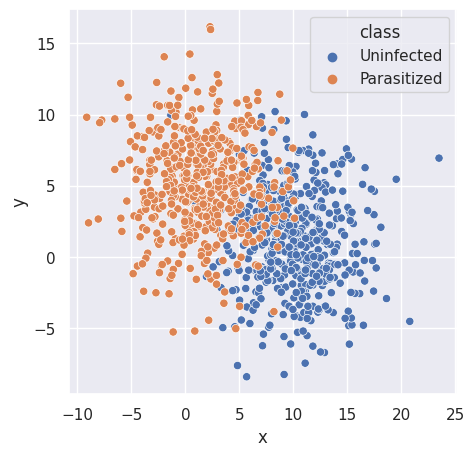

In [ ]:
# Visualizing cell clusters per class
scale = 3.5
size = 500

class1_x = np.random.normal(loc = 10, scale = scale, size = size)
class1_y = np.random.normal(loc = 1, scale = scale, size = size)

class2_x = np.random.normal(loc = 1, scale = scale, size = size)
class2_y = np.random.normal(loc = 5, scale = scale, size = size)

df_class1 = pd.DataFrame({'x' : class1_x, 'y' : class1_y, 'class': 'Uninfected'})
df_class2 = pd.DataFrame({'x' : class2_x, 'y' : class2_y, 'class': 'Parasitized'})
df = df_class1.append(df_class2, ignore_index = True)

# Plot to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'x', y = 'y', hue = 'class', data = df)
plt.show()

<div class="alert alert-info"><font size='2'>For classification, idearly we want to see two neat and separate clusters. We see some class overlaps - that is, some parasitized cells that are closer to the cluster centroids of the uninfected cells and vice versa, which may mean some cells from different clusters have profiles that are silimilar to opposite clusters and/classification can be improved. </font></div>

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
# Fixing seed for random number generators - this aids reproducibility of these results each time this code is run.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

clear_backend # Clearing keras backend

###<b> Building the Model

In [ ]:
# Building CNN model architecture with more layers to see whether we can improve performance:
def cnn_model_1():
    model = Sequential([ #Intializing sequential model
                        # Adding first convolutional layer with 32 filters and the kernel size of 2x2.
                        # Using the 'same' padding, activation function as "relu" and providing the input shape = (64, 64, 3)
                        Conv2D(32, (2, 2), padding = "same", activation = "relu", input_shape = (64, 64, 3)),
                        Conv2D(32, (2, 2), padding = "same", activation = "relu"),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a third and fourth Convolutional layer with 64 and 128 filters and the kernel size of 2x2 with 'same' padding and activation function as "relu"
                        Conv2D(64, (2, 2), padding = "same", activation = "relu"),
                        Conv2D(128, (2, 2), padding = "same", activation = "relu"),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                         # Adding a fifth Convolutional layer with 256 filters and the kernel size of 2x2 with 'same' padding and activation function as "relu"
                        Conv2D(256, (2, 2), padding = "same", activation = "relu"),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a layer to flatten the output from the previous layer
                        Flatten(),
                        # Adding a dense layer with 512 neurons
                        Dense(512, activation = "relu"),
                        # Adding a dropout layer with the rate equal to 0.4
                        Dropout(0.4),
                         # Adding final dense layer with 2 nodes and activation function as softmax to compute class probabilities
                        Dense(2, activation = "softmax") # 2 represents output layer neurons for the 2 classes
                        ])
    return model

###<b> Compiling the model

In [ ]:
# Building and compiling the model
# Using Adam optimizer
#optimizer = Adam(learning_rate = 0.001)
optimizer = 'adam'

# Building the model
cnn_model1 = cnn_model_1()

# Compiling the model with the loss equal to categorical_crossentropy, and metric equal to 'accuracy'
cnn_model1.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating and printing the summary of the model
cnn_model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        416       
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        8256      
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 128)       32896     
                                                      

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fitting the model with set parameters
history_model1 = cnn_model1.fit(X_train, y_train,
                                batch_size = 32,
                                callbacks = callbacks,
                                validation_split = 0.2,
                                epochs = 20,
                                verbose = 1)

Epoch 1/20
552/552 [==============================] - 15s 21ms/step - loss: 0.3828 - accuracy: 0.8043 - val_loss: 0.1040 - val_accuracy: 0.9748
Epoch 2/20
552/552 [==============================] - 11s 20ms/step - loss: 0.0906 - accuracy: 0.9716 - val_loss: 0.0784 - val_accuracy: 0.9751
Epoch 3/20
552/552 [==============================] - 11s 20ms/step - loss: 0.0734 - accuracy: 0.9769 - val_loss: 0.0764 - val_accuracy: 0.9755
Epoch 4/20
552/552 [==============================] - 11s 19ms/step - loss: 0.0696 - accuracy: 0.9765 - val_loss: 0.0779 - val_accuracy: 0.9785
Epoch 5/20
552/552 [==============================] - 11s 20ms/step - loss: 0.0622 - accuracy: 0.9794 - val_loss: 0.0613 - val_accuracy: 0.9789
Epoch 6/20
552/552 [==============================] - 11s 20ms/step - loss: 0.0678 - accuracy: 0.9783 - val_loss: 0.0638 - val_accuracy: 0.9812
Epoch 7/20
552/552 [==============================] - 12s 21ms/step - loss: 0.0570 - accuracy: 0.9798 - val_loss: 0.0684 - val_accuracy:

###<b> Evaluating the model

In [ ]:
# Evaluating the model on the test data - Checking test accuracy

accuracy = cnn_model1.evaluate(X_test, y_test, verbose = 2)
print(accuracy)
print('\n', 'Model accuracy on test set:', "{0:.2%}".format(accuracy[1],3))

173/173 - 1s - loss: 0.0717 - accuracy: 0.9800 - 1s/epoch - 6ms/step
[0.07170356810092926, 0.9800435304641724]

 Model accuracy on test set: 98.00%


<b> Plotting the confusion matrix

173/173 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2760
           1       0.98      0.98      0.98      2752

    accuracy                           0.98      5512
   macro avg       0.98      0.98      0.98      5512
weighted avg       0.98      0.98      0.98      5512



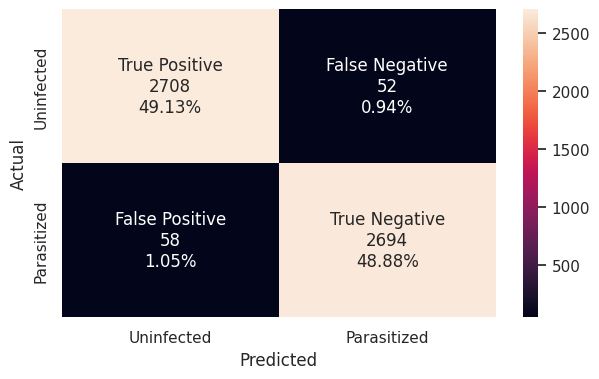

In [ ]:
# Converting each entry of y_test to a single label to obtain categorical values
y_predictions = cnn_model1.predict(X_test)
y_predictions = np.argmax(y_predictions, axis = 1)
y_test_arg = np.argmax(y_test, axis = 1)

# Printing the classification report
print(classification_report(y_test_arg, y_predictions))

# Plotting the Confusion Matrix using the confusion matrix() function which is also a predefined tensorflow module
# Calculating the confusion matrix
cm = confusion_matrix(y_test_arg, y_predictions)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Uninfected', 'Parasitized']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories)

<b> Plotting the train and the validation curves

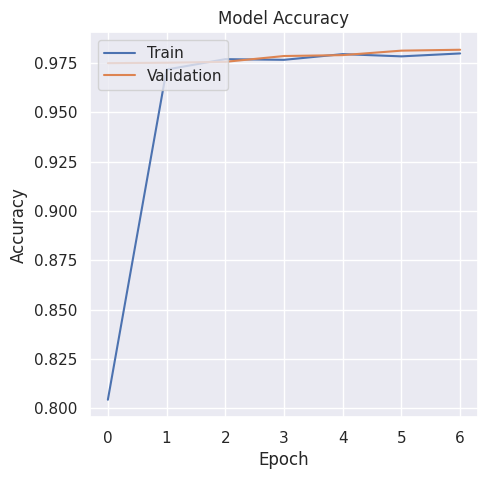

In [ ]:
# Plotting training and validation curves
# set the figure size
plt.figure(figsize = (5,5))
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

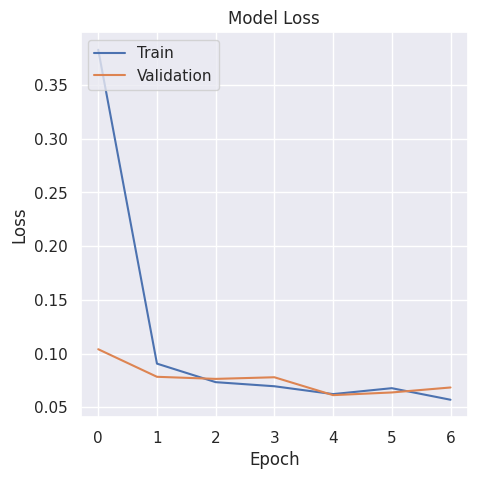

In [ ]:
# Plotting training and validation loss
plt.figure(figsize = (5,5))
plt.plot(history_model1.history['loss'])
plt.plot(history_model1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<div class="alert alert-info"><font size='2'>We can see that adding a few more convolution, maxpooling, dropout, and dense layers has given us a slight improvement in model performance - trainable parameters reducing by almost 8 fold, that is from 67,144,130 to 8,567,170. In next sections, we'll train more models and conduct hyperparameter tuning to decide on optimal parameters for the models.</font></div>

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
# Fixing seed for random number generators - this aids reproducibility of these results each time this code is run.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

clear_backend # Clearing keras backend

###<b> Building the Model

In [ ]:
# Building CNN model architecture: - with batchNormalization and using LeakyRelu as the activation function.
def cnn_model_2():
    model = Sequential([ #Intializing sequential model
                        # Adding first convolutional layer with 32 filters and the kernel size of 2x2.
                        # Using the 'same' padding, and providing the input shape = (64, 64, 3)
                        Conv2D(32, (2, 2), padding = "same", input_shape = (64, 64, 3)),
                         # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a second Convolutional layer with 32 filters and the kernel size of 2x2
                        Conv2D(32, (2, 2), padding = "same"),
                         # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                         # Adding a BatchNormalization layer
                        BatchNormalization(),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a third Convolutional layer with 64 filters and the kernel size of 2x2 with 'same' padding
                        Conv2D(64, (2, 2), padding = "same"),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a fourth Convolutional layer with 128 filters and the kernel size of 2x2 with 'same' padding
                        Conv2D(128, (2, 2), padding = "same"),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                         # Adding a BatchNormalization layer
                        BatchNormalization(),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                         # Adding a fifth Convolutional layer with 256 filters and the kernel size of 2x2 with 'same' padding
                        Conv2D(256, (2, 2), padding = "same"),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a BatchNormalization layer
                        BatchNormalization(),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a layer to flatten the output from the previous layer
                        Flatten(),
                        # Adding a dense layer with 512 nodes
                        Dense(512),
                        # Adding a dropout layer with the rate equal to 0.4
                        Dropout(0.4),
                         # Adding final dense layer with 2 nodes and activation function as softmax to compute class probabilities
                        Dense(2, activation = "softmax") # 2 represents output layer neurons for the 2 classes
                        ])
    return model

###<b>Compiling the model

In [ ]:
# Building and compiling the model
# Using Adam optimizer
# optimizer = Adam(learning_rate = 0.005)
optimizer = 'adam'

# Building the model
cnn_model2 = cnn_model_2()

# Compiling the model with the loss equal to categorical_crossentropy, and metric equal to 'accuracy'
cnn_model2.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating and printing the summary of the model
cnn_model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 32)        4128      
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                     

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
# Fitting the model with set parameters
history_model2 = cnn_model2.fit(X_train, y_train,
                                batch_size = 32,
                                callbacks = callbacks,
                                validation_split = 0.2,
                                epochs = 20,
                                verbose = 1)

Epoch 1/20
552/552 [==============================] - 17s 24ms/step - loss: 2.3845 - accuracy: 0.8246 - val_loss: 2.6108 - val_accuracy: 0.5649
Epoch 2/20
552/552 [==============================] - 13s 23ms/step - loss: 0.1496 - accuracy: 0.9528 - val_loss: 0.6157 - val_accuracy: 0.8723
Epoch 3/20
552/552 [==============================] - 13s 23ms/step - loss: 0.1288 - accuracy: 0.9614 - val_loss: 0.2145 - val_accuracy: 0.9485
Epoch 4/20
552/552 [==============================] - 13s 23ms/step - loss: 0.1267 - accuracy: 0.9627 - val_loss: 0.1438 - val_accuracy: 0.9621
Epoch 5/20
552/552 [==============================] - 13s 23ms/step - loss: 0.1198 - accuracy: 0.9672 - val_loss: 0.1943 - val_accuracy: 0.9503
Epoch 6/20
552/552 [==============================] - 13s 23ms/step - loss: 0.1297 - accuracy: 0.9688 - val_loss: 0.1843 - val_accuracy: 0.9601


<b>Plotting the train and validation accuracy

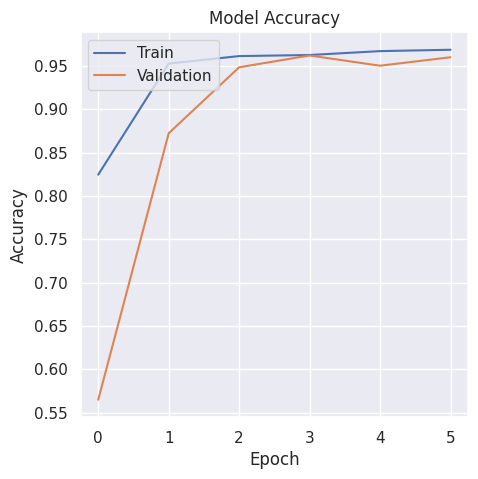

In [ ]:
# Plotting training and validation curves
# set the figure size
plt.figure(figsize = (5,5))
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


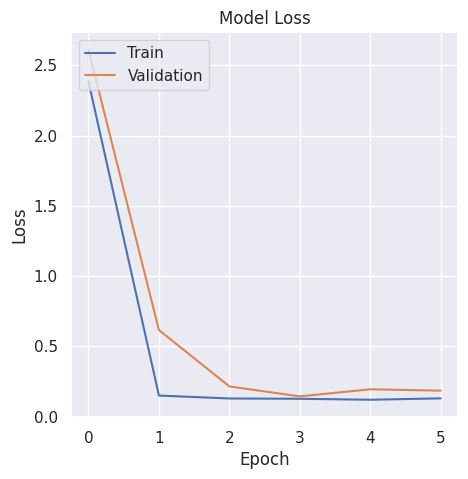

In [ ]:
# Plotting training and validation loss
plt.figure(figsize = (5,5))
plt.plot(history_model2.history['loss'])
plt.plot(history_model2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###<b>Evaluating the model

In [ ]:
# Evaluating the model on the test data - Checking test accuracy

accuracy = cnn_model2.evaluate(X_test, y_test, verbose = 2)
print(accuracy)
print('\n', 'Model accuracy on test set:', "{0:.2%}".format(accuracy[1],3))

173/173 - 1s - loss: 0.1662 - accuracy: 0.9657 - 1s/epoch - 7ms/step
[0.16619108617305756, 0.9657111763954163]

 Model accuracy on test set: 96.57%


#### <div class="alert alert-info">Observations and insights:<br><font size='2'>add text</font></div>

<b> Generate the classification report and confusion matrix

173/173 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2760
           1       0.97      0.96      0.97      2752

    accuracy                           0.97      5512
   macro avg       0.97      0.97      0.97      5512
weighted avg       0.97      0.97      0.97      5512



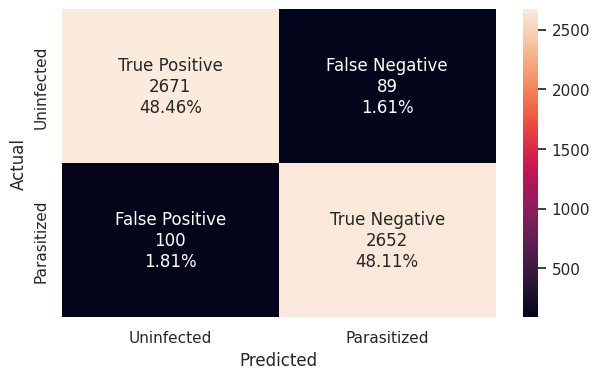

In [ ]:
# Converting each entry of y_test to a single label to obtain categorical values
y_predictions = cnn_model2.predict(X_test)
y_predictions = np.argmax(y_predictions, axis = 1)
y_test_arg = np.argmax(y_test, axis = 1)

# Printing the classification report
print(classification_report(y_test_arg, y_predictions))

# Plotting the Confusion Matrix using the confusion matrix() function which is also a predefined tensorflow module
# Calculating the confusion matrix
cm = confusion_matrix(y_test_arg, y_predictions)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Uninfected', 'Parasitized']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories)

### <font color='#19597C'><font size='4'><i>Hyperparameter Tuning:</i></font>

Using random Search CV to optimise the above CNN

Some important hyperparameters to look out for while optimizing our networks are the type of architecture, the number of layers, number of neurons in a layer, regularization hyperparameters, the learning rate, type of optimizer, and the dropout rate. We have a breadth of parameters we can optimize and randomized search is a great tool to help us fine time our neural networks. (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)


In [ ]:
# Fixing seed for random number generators - this aids reproducibility of these results each time this code is run.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


# Setting callable variable to clear keras backend
clear_backend = backend.clear_session()
clear_backend


def create_model_randomSearch(activation, lr, batch_size, epochs):
  model = Sequential([ #Intializing sequential model
                        # Adding first convolutional layer with 32 filters and the kernel size of 2x2.
                        # Using the 'same' padding, and providing the input shape = (64, 64, 3)
                        Conv2D(32, (2, 2), padding = "same", input_shape = (64, 64, 3)),
                         # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a second Convolutional layer with 32 filters and the kernel size of 2x2
                        Conv2D(32, (2, 2), padding = "same"),
                         # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                         # Adding a BatchNormalization layer
                        BatchNormalization(),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a third Convolutional layer with 64 filters and the kernel size of 2x2 with 'same' padding
                        Conv2D(64, (2, 2), padding = "same"),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a fourth Convolutional layer with 128 filters and the kernel size of 2x2 with 'same' padding
                        Conv2D(128, (2, 2), padding = "same"),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                         # Adding a BatchNormalization layer
                        BatchNormalization(),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                         # Adding a fifth Convolutional layer with 256 filters and the kernel size of 2x2 with 'same' padding
                        Conv2D(256, (2, 2), padding = "same"),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a BatchNormalization layer
                        BatchNormalization(),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a layer to flatten the output from the previous layer
                        Flatten(),
                        # Adding a dense layer with 512 nodes
                        Dense(512),
                        # Adding a dropout layer with the rate equal to 0.4
                        Dropout(0.4),
                        # Adding final dense layer with 2 nodes and activation function as softmax to compute class probabilities
                        Dense(2, activation = "softmax") # 2 represents output layer neurons for the 2 classes
                       ])

  #compiling model
  optimizer = tf.keras.optimizers.Adam(learning_rate= lr)
  model.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [ ]:
# We are using Random search to optimize model hyperparameters
keras_estimator = KerasClassifier(build_fn=create_model_randomSearch, verbose=1)

# define the grid search parameters
param_random = {
    'activation': ["relu", "LeakyReLU"],
    "lr":[0.01,0.1,0.001],
    'batch_size':[32, 64, 128],
    'epochs': [10, 30]}

kfold_splits = 5
random= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_distributions=param_random)

In [ ]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
368/368 [==============================] - 13s 24ms/step - loss: 187.2065 - accuracy: 0.5307 - val_loss: 1.7415 - val_accuracy: 0.5010
Epoch 2/10
368/368 [==============================] - 8s 22ms/step - loss: 14.5180 - accuracy: 0.5326 - val_loss: 0.7644 - val_accuracy: 0.5435
Epoch 3/10
368/368 [==============================] - 8s 22ms/step - loss: 0.9938 - accuracy: 0.5490 - val_loss: 1.7550 - val_accuracy: 0.5054
Epoch 4/10
368/368 [==============================] - 8s 23ms/step - loss: 773.0176 - accuracy: 0.5231 - val_loss: 3263.4775 - val_accuracy: 0.5048
Epoch 5/10
368/368 [==============================] - 8s 23ms/step - loss: 7618.1509 - accuracy: 0.5427 - val_loss: 12.3916 - val_accuracy: 0.4806
Epoch 6/10
368/368 [==============================] - 8s 22ms/step - loss: 4.0369 - accuracy: 0.5520 - val_loss: 0.8328 - val_accuracy: 0.5571
Epoch 7/10
368/368 [==============================] - 9s 23ms/step -

<div class="alert alert-info"><font size='2'>From the hyperparameter tuning run using RandomizedSearchCV, the optimal learning rate, number of epochs, batch size and activation function are 0.001, 30, 32 and relu respectively. Given the time taken to conduct these runs, we shall not test other methods like GridSearchCV or Dask, however, we can fine tune our model further to see whether it can achieve a higher prediction accuracy. In the next section I will atempt to build another model leverating some of this information.</font></div>

In [ ]:
# Fixing seed for random number generators - this aids reproducibility of these results each time this code is run.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


# Setting callable variable to clear keras backend
clear_backend

In [ ]:
X_train = X_train_alpha
y_train = y_train_alpha

X_test = X_test_alpha
y_test = y_test_alpha

# Building CNN model architecture:
def cnn_model_tuned():
    model = Sequential([ #Intializing sequential model
                        # Adding first convolutional layer with 32 filters and the kernel size of 2x2.
                        # Using the 'same' padding, and providing the input shape = (64, 64, 3)
                        Conv2D(32, (2, 2), padding = "same", input_shape = (64, 64, 3)),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a second Convolutional layer with 64 filters and the kernel size of 2x2
                        Conv2D(64, (2, 2), padding = "same"),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a BatchNormalization layer
                        BatchNormalization(),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a third and fourth Convolutional layer with 128 and 256 filters respectively, and the kernel size of 2x2 with 'same' padding
                        Conv2D(128, (2, 2), padding = "same"),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        Conv2D(256, (2, 2), padding = "same"),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a BatchNormalization layer
                        BatchNormalization(),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a layer to flatten the output from the previous layer
                        Flatten(),
                        # Adding a dense layer with 512 nodes
                        Dense(512),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a dropout layer with the rate equal to 0.5
                        Dropout(0.5),
                         # Adding final dense layer with 2 nodes and activation function as softmax to compute class probabilities
                        Dense(2, activation = "softmax") # 2 represents output layer neurons for the 2 classes
                        ])
    return model

In [ ]:
# Building and compiling the model
# Using Adam optimizer
#optimizer = Adam(learning_rate = 0.001)
optimizer = 'adam'

# Building the model
cnn_modelTuned = cnn_model_tuned()

# Compiling the model with the loss equal to categorical_crossentropy, and metric equal to 'accuracy'
cnn_modelTuned.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating and printing the summary of the model
cnn_modelTuned.summary()

#callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


# Fitting the model with set parameters
history_cnn_modelTuned= cnn_modelTuned.fit(X_train, y_train,
                                batch_size = 32,
                                callbacks = callbacks,
                                validation_split = 0.2,
                                epochs = 5,
                                verbose = 1)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_47 (Conv2D)          (None, 64, 64, 64)        8256      
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                    

In [ ]:
# Evaluating the model on the test data - Checking test accuracy

accuracy = cnn_modelTuned.evaluate(X_test, y_test, verbose = 2)
print(accuracy)
print('\n', 'Model accuracy on test set:', "{0:.2%}".format(accuracy[1],3))

173/173 - 2s - loss: 0.1241 - accuracy: 0.9588 - 2s/epoch - 9ms/step
[0.12413183599710464, 0.9588171243667603]

 Model accuracy on test set: 95.88%


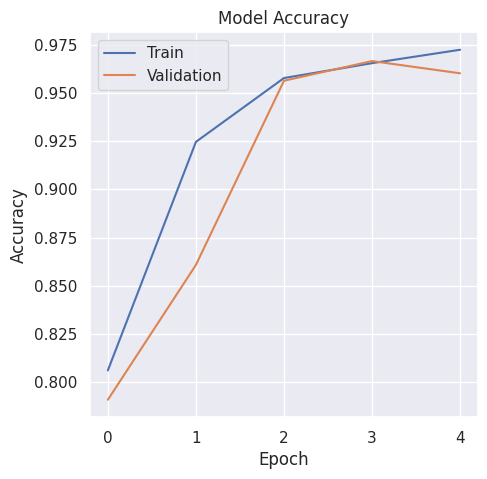

In [ ]:
# Plotting training and validation curves
# set the figure size
plt.figure(figsize = (5,5))
plt.plot(history_cnn_modelTuned.history['accuracy'])
plt.plot(history_cnn_modelTuned.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

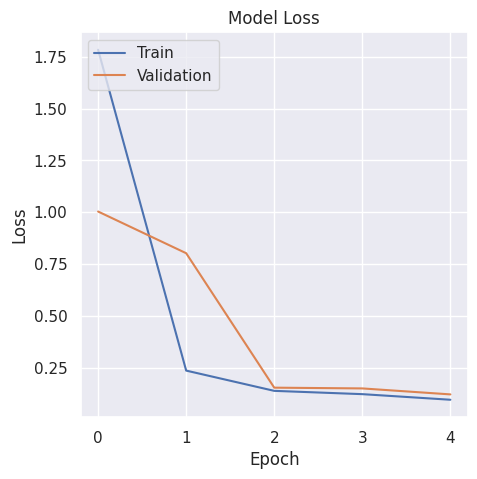

In [ ]:
# Plotting training and validation loss
plt.figure(figsize = (5,5))
plt.plot(history_cnn_modelTuned.history['loss'])
plt.plot(history_cnn_modelTuned.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

173/173 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2760
           1       0.93      0.99      0.96      2752

    accuracy                           0.96      5512
   macro avg       0.96      0.96      0.96      5512
weighted avg       0.96      0.96      0.96      5512



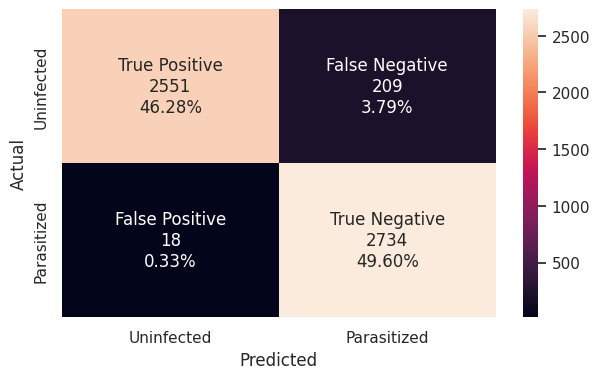

In [ ]:
# Converting each entry of y_test to a single label to obtain categorical values
y_predictions = cnn_modelTuned.predict(X_test)
y_predictions = np.argmax(y_predictions, axis = 1)
y_test_arg = np.argmax(y_test, axis = 1)

# Printing the classification report
print(classification_report(y_test_arg, y_predictions))

# Plotting the Confusion Matrix using the confusion matrix() function which is also a predefined tensorflow module
# Calculating the confusion matrix
cm = confusion_matrix(y_test_arg, y_predictions)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Uninfected', 'Parasitized']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories)

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
# Fixing seed for random number generators - this aids reproducibility of these results each time this code is run.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

clear_backend # Clearing keras backend

###<b> Use image data generator

In [ ]:
# Often, input images come in different forms, sizes, shapes quality, orientaion, different compression methods applied, e.t.c
# which becomes a challenge during training. CNNs have a property of translational invariance where they can recognize an
# object as an object, even when its appearance varies translationally in some way.
# Leveraging this property, we can augment our images using the ImageDataGenerator():

X_train = X_train_alpha
X_test = X_test_alpha

y_train = y_train_alpha
y_test = y_test_alpha

train_datagen = ImageDataGenerator(horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.1,
                              width_shift_range=0.1,
                              rotation_range=20,
                              shear_range = 0.1,
                              zoom_range=0.1)

val_datagen  = ImageDataGenerator() #no augmentation on the validation/test data set

# Flowing training images in batches of 64 using train_datagen generator
train_generator = train_datagen.flow(X_train, y_train,
                                     batch_size=64,seed = 42,
                                     shuffle = True)

# Flowing testing images in batches of 64 using test_datagen generator
val_generator = val_datagen.flow(X_test, y_test,
                                 batch_size=64, seed = 42,
                                 shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

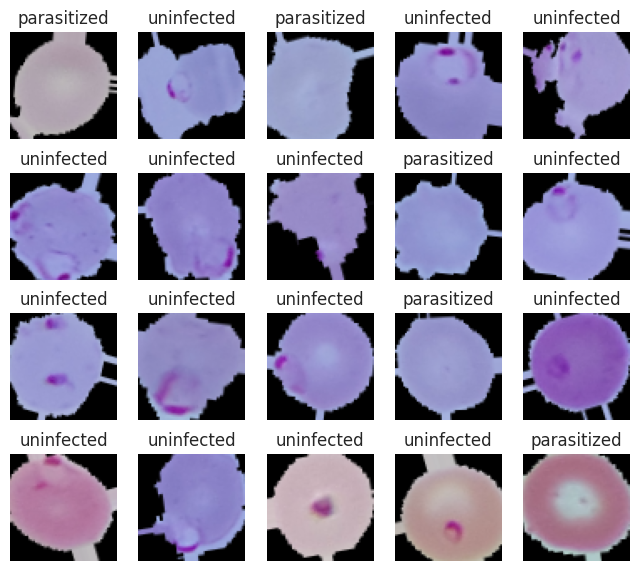

In [ ]:
images, labels = next(train_generator)

# Plotting 20 images from the training data
fig, axes = plt.subplots(4, 5, figsize = (8, 7))

for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1:
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

#### <div class="alert alert-info">Observations and insights:<br><font size='2'>Data augmentation is a useful technique that can be used to artificially increase the size of a training dataset by creating modified versions of images in the dataset. This is especially crucial as collected data often comes in different forms, sizes, shapes, colors, orientations, e.t.c, Training deep learning neural network models on more data can result in more intelligent CNNs, and the augmentation techniques can create variations of the images that can improve the ability of our models to generalize what they have learned to new images. In essence making our models more robust by making them invariant to image transitions or orientations. In the above section, the data have been augmented using an image data generator from keras. Distinctively, these images seem to have an axis anchor that we didn’t see before. Whether this is an effect of augmentation is something to look into further. We however expect our models to perform better, given this notion. Another aspect to note is that most of our images are almost circular with some cells more ragged than others, somewhat different from the differences that would be introduced by flipping a dog (flipping a circular object will not change the edges much). It, will still be interesting to see the effect of augmentation on our datasets given we have some cells whose shape does not conform to the normal.
<font size='2'><i>Augmentation on the taining (not the test dataset), has been applied as follows:</i>
* horizontal_flip = True,
* vertical_flip = False,
* height_shift_range= 0.1,
* width_shift_range=0.1,
* rotation_range=20,
* shear_range = 0.1,
* zoom_range=0.1</font></font></div>

###<b>Building the Model

In [ ]:
# Building CNN model architecture:
def cnn_model_3():
  model = Sequential([ #Intializing sequential model
                      # Adding first convolutional layer with 32 filters and the kernel size of 2x2.
                      # Using the 'same' padding, activation function as "relu" and providing the input shape = (64, 64, 3)
                      Conv2D(32, (2, 2), padding = "same", input_shape = (64, 64, 3)),
                      # Adding a LeakyRelu layer with the slope equal to 0.1
                      LeakyReLU(0.1),
                      Conv2D(32, (2, 2), padding = "same"),
                      # Adding a LeakyRelu layer with the slope equal to 0.1
                      LeakyReLU(0.1),
                      # Adding a max-pooling layer with a pool size of 2x2
                      MaxPooling2D(2,2),
                      # Adding a BatchNormalization layer
                      BatchNormalization(),
                      # Adding a dropout layer with the rate equal to 0.2
                      Dropout(0.2),
                      # Adding a second Convolutional layer with 64 filters and the kernel size of 2x2 with 'same' padding and activation function as "relu"
                      Conv2D(64, (2, 2), padding = "same"),
                      # Adding a LeakyRelu layer with the slope equal to 0.1
                      LeakyReLU(0.1),
                      Conv2D(128, (2, 2), padding = "same"),
                      # Adding a LeakyRelu layer with the slope equal to 0.1
                      LeakyReLU(0.1),
                      # Adding a max-pooling layer with a pool size of 2x2
                      MaxPooling2D(2,2),
                      # Adding a BatchNormalization layer
                      BatchNormalization(),
                      # Adding a dropout layer with the rate equal to 0.2
                      Dropout(0.2),
                      # Adding a second Convolutional layer with 256 filters and the kernel size of 2x2 with 'same' padding and activation function as "relu"
                      Conv2D(256, (2, 2), padding = "same"),
                      # Adding a LeakyRelu layer with the slope equal to 0.1
                      LeakyReLU(0.1),
                      # Adding a max-pooling layer with a pool size of 2x2
                      MaxPooling2D(2,2),
                      # Adding a BatchNormalization layer
                      BatchNormalization(),
                      # Adding a dropout layer with the rate equal to 0.2
                      Dropout(0.2),
                      # Adding a layer to flatten the output from the previous layer
                      Flatten(),
                      # Adding a dense layer with 512 nodes
                      Dense(512),
                      # Adding a dropout layer with the rate equal to 0.4
                      Dropout(0.4),
                      # Adding final dense layer with 2 nodes and activation function as softmax to compute class probabilities
                      Dense(2, activation = "softmax") # 2 represents output layer neurons
                       ])
  return model


# Building and compiling the model
# Using Adam optimizer with a learning rate of 0.001
# optimizer = Adam(learning_rate = 0.001)
optimizer = 'adam'

# Building the model
cnn_model3 = cnn_model_3()

# Compiling the model with the loss equal to categorical_crossentropy, and metric equal to 'accuracy'
cnn_model3.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating and printing the summary of the model
cnn_model3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 64, 64, 32)        4128      
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                    

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
# Pulling a batch of random testing data for testing after each epoch
testX, testY = val_generator.next()

# Fitting the model with 32 as the batch size
#history_model3 = cnn_model3.fit(X_train, y_train,
history_model3 = cnn_model3.fit(train_generator,
                              validation_data=(testX, testY),
                                batch_size = 32,
                                callbacks = callbacks,
                                validation_split = 0.2,
                                epochs = 20,
                                verbose = 1)

Epoch 1/20
345/345 [==============================] - 33s 85ms/step - loss: 0.7009 - accuracy: 0.6872 - val_loss: 12.2718 - val_accuracy: 0.4688
Epoch 2/20
345/345 [==============================] - 29s 85ms/step - loss: 0.1750 - accuracy: 0.9412 - val_loss: 0.2025 - val_accuracy: 0.9062
Epoch 3/20
345/345 [==============================] - 29s 83ms/step - loss: 0.1276 - accuracy: 0.9615 - val_loss: 0.2708 - val_accuracy: 0.9062
Epoch 4/20
345/345 [==============================] - 29s 85ms/step - loss: 0.1140 - accuracy: 0.9661 - val_loss: 0.5153 - val_accuracy: 0.9062


###<B>Evaluating the model

<b>Plot the train and validation accuracy

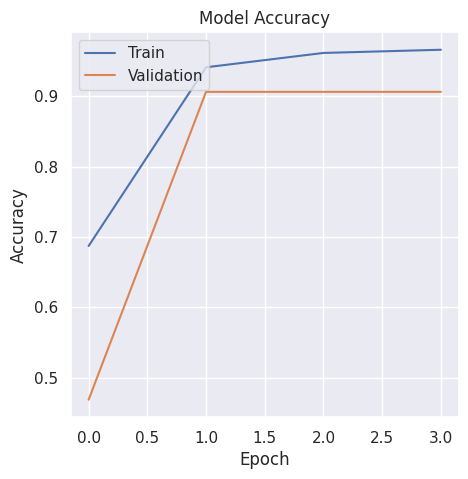

In [ ]:
# Plotting training and validation curves
# set the figure size
plt.figure(figsize = (5,5))
plt.plot(history_model3.history['accuracy'])
plt.plot(history_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

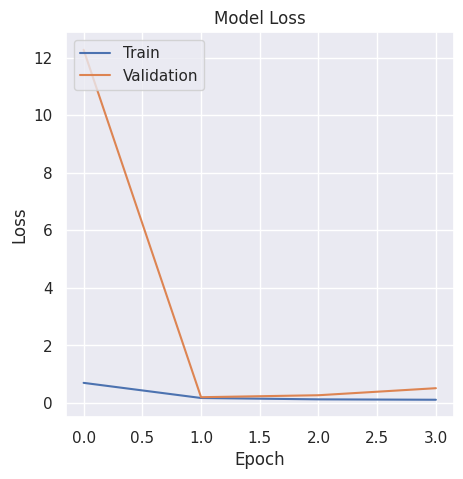

In [ ]:
# Plotting training and validation loss
plt.figure(figsize = (5,5))
plt.plot(history_model3.history['loss'])
plt.plot(history_model3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the test data - Checking test accuracy

accuracy = cnn_model3.evaluate(testX, testY, verbose = 2)
print(accuracy)
print('\n', 'Model accuracy on test set:', "{0:.2%}".format(accuracy[1],3))

2/2 - 0s - loss: 0.5153 - accuracy: 0.9062 - 39ms/epoch - 19ms/step
[0.5152562856674194, 0.90625]

 Model accuracy on test set: 90.62%


<B>Plotting the classification report and confusion matrix

2/2 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        34
           1       0.83      1.00      0.91        30

    accuracy                           0.91        64
   macro avg       0.92      0.91      0.91        64
weighted avg       0.92      0.91      0.91        64



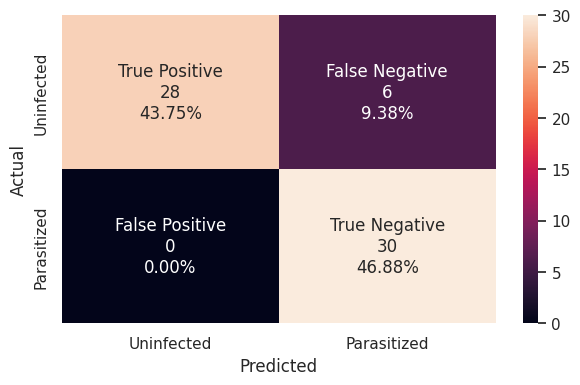

In [ ]:
# Converting each entry of y_test to a single label to obtain categorical values
y_predictions = cnn_model3.predict(testX)
y_predictions = np.argmax(y_predictions, axis = 1)
y_test_arg = np.argmax(testY, axis = 1)

# Printing the classification report
print(classification_report(y_test_arg, y_predictions))

# Plotting the Confusion Matrix using the confusion matrix() function which is also a predefined tensorflow module
# Calculating the confusion matrix
cm=confusion_matrix(y_test_arg, y_predictions)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Uninfected', 'Parasitized']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories)

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
# Fixing seed for random number generators - this aids reproducibility of these results each time this code is run.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

clear_backend # Clearing keras backend

In [ ]:
# Using the idea of Transfer Learning: Loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset
# Schematic of the VGG16 model:
model = VGG16(weights='imagenet')
model.summary()
# For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them.
# We will remove the already-present fully-connected layers and add our own fully-connected layers for this binary classification task.
# Summary of the whole model

553467096/553467096 [==============================] - 24s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
# Getting only the convolution layers for transfer learning.
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3)) # include_top = False => exclude fully-connected layers at the top of VGG16's network
vgg_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
# Building the model
model4_vgg = Sequential()

# Adding the convolutional part of the VGG16 model from above
model4_vgg.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model4_vgg.add(Flatten())

# Adding a dense output layer
model4_vgg.add(Dense(256, activation='relu'))
model4_vgg.add(Dense(512, activation='relu'))
model4_vgg.add(Dropout(0.5))
model4_vgg.add(Dense(2, activation='softmax'))

###<b>Compiling the model

In [ ]:
model4_vgg.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4_vgg.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 2048)              0         
                                                                 
 dense_29 (Dense)            (None, 256)               524544    
                                                                 
 dense_30 (Dense)            (None, 512)               131584    
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_31 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 15,371,842
Trainable params: 657,154
No

<b> using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Pulling a batch of random testing data for testing after each epoch
testX, testY = val_generator.next()

## Fitting the VGG model
model4_vgg_history = model4_vgg.fit(train_generator,
                                  validation_data=(testX, testY),
                                  epochs=10, callbacks = callbacks)

Epoch 1/10
345/345 [==============================] - 29s 80ms/step - loss: 0.2927 - accuracy: 0.8761 - val_loss: 0.3301 - val_accuracy: 0.8594
Epoch 2/10
345/345 [==============================] - 27s 77ms/step - loss: 0.2119 - accuracy: 0.9144 - val_loss: 0.1777 - val_accuracy: 0.9375
Epoch 3/10
345/345 [==============================] - 27s 79ms/step - loss: 0.2056 - accuracy: 0.9184 - val_loss: 0.1522 - val_accuracy: 0.9375
Epoch 4/10
345/345 [==============================] - 27s 78ms/step - loss: 0.1964 - accuracy: 0.9237 - val_loss: 0.1121 - val_accuracy: 0.9688
Epoch 5/10
345/345 [==============================] - 26s 76ms/step - loss: 0.1916 - accuracy: 0.9255 - val_loss: 0.1535 - val_accuracy: 0.9375
Epoch 6/10
345/345 [==============================] - 27s 79ms/step - loss: 0.1899 - accuracy: 0.9270 - val_loss: 0.1426 - val_accuracy: 0.9375


<b>Plot the train and validation accuracy

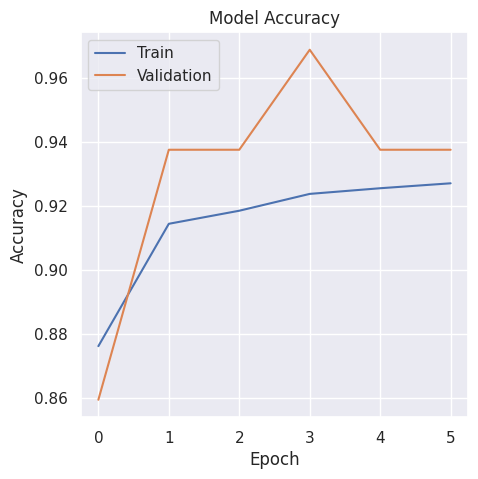

In [ ]:
# Plotting training and validation curves
# set the figure size
plt.figure(figsize = (5,5))
plt.plot(model4_vgg_history.history['accuracy'])
plt.plot(model4_vgg_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

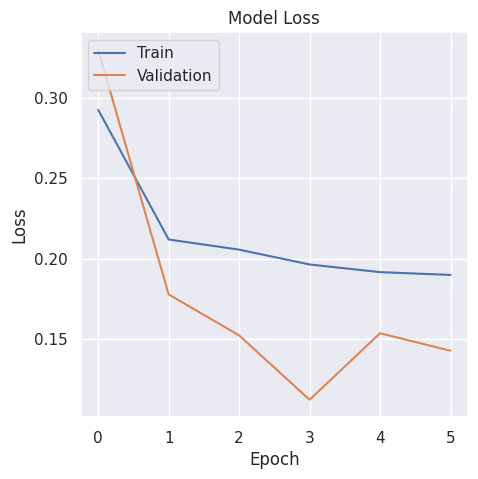

In [ ]:
# Plotting training and validation loss
plt.figure(figsize = (5,5))
plt.plot(model4_vgg_history.history['loss'])
plt.plot(model4_vgg_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### <div class="alert alert-info">Observations and insights:<br><font size='2'>Transfer Learning has recently become a key technique using in Deep Learning where a pre-trained model is reused on a new problem. This is helpful especially in cases where we don't have enough labeled data to train on. With transfer learning, our models exploit knowledge gained from a previous task to improve generalization about another model. For this task we loaded a pre-built architecture - VGG16, which was trained on the ImageNet dataset. Below is a schematic of the VGG16 model. Here I used the convolutional and pooling layers for feature extraction while excluding the top layers of the model that is fully-connected layers and added my own fully-connected layers for this binary classification task. Here we see that validation accuracy is flactuating and deeps at epoch 4 with the loss increasing at the same epoch. This may indicate that the model's learning rate could be high and needing lowering. We may need to adjust the dropout rate or reduce the number of model layers. Overall, hyperparameter tuning needs to be done to improve this model.</font></div>

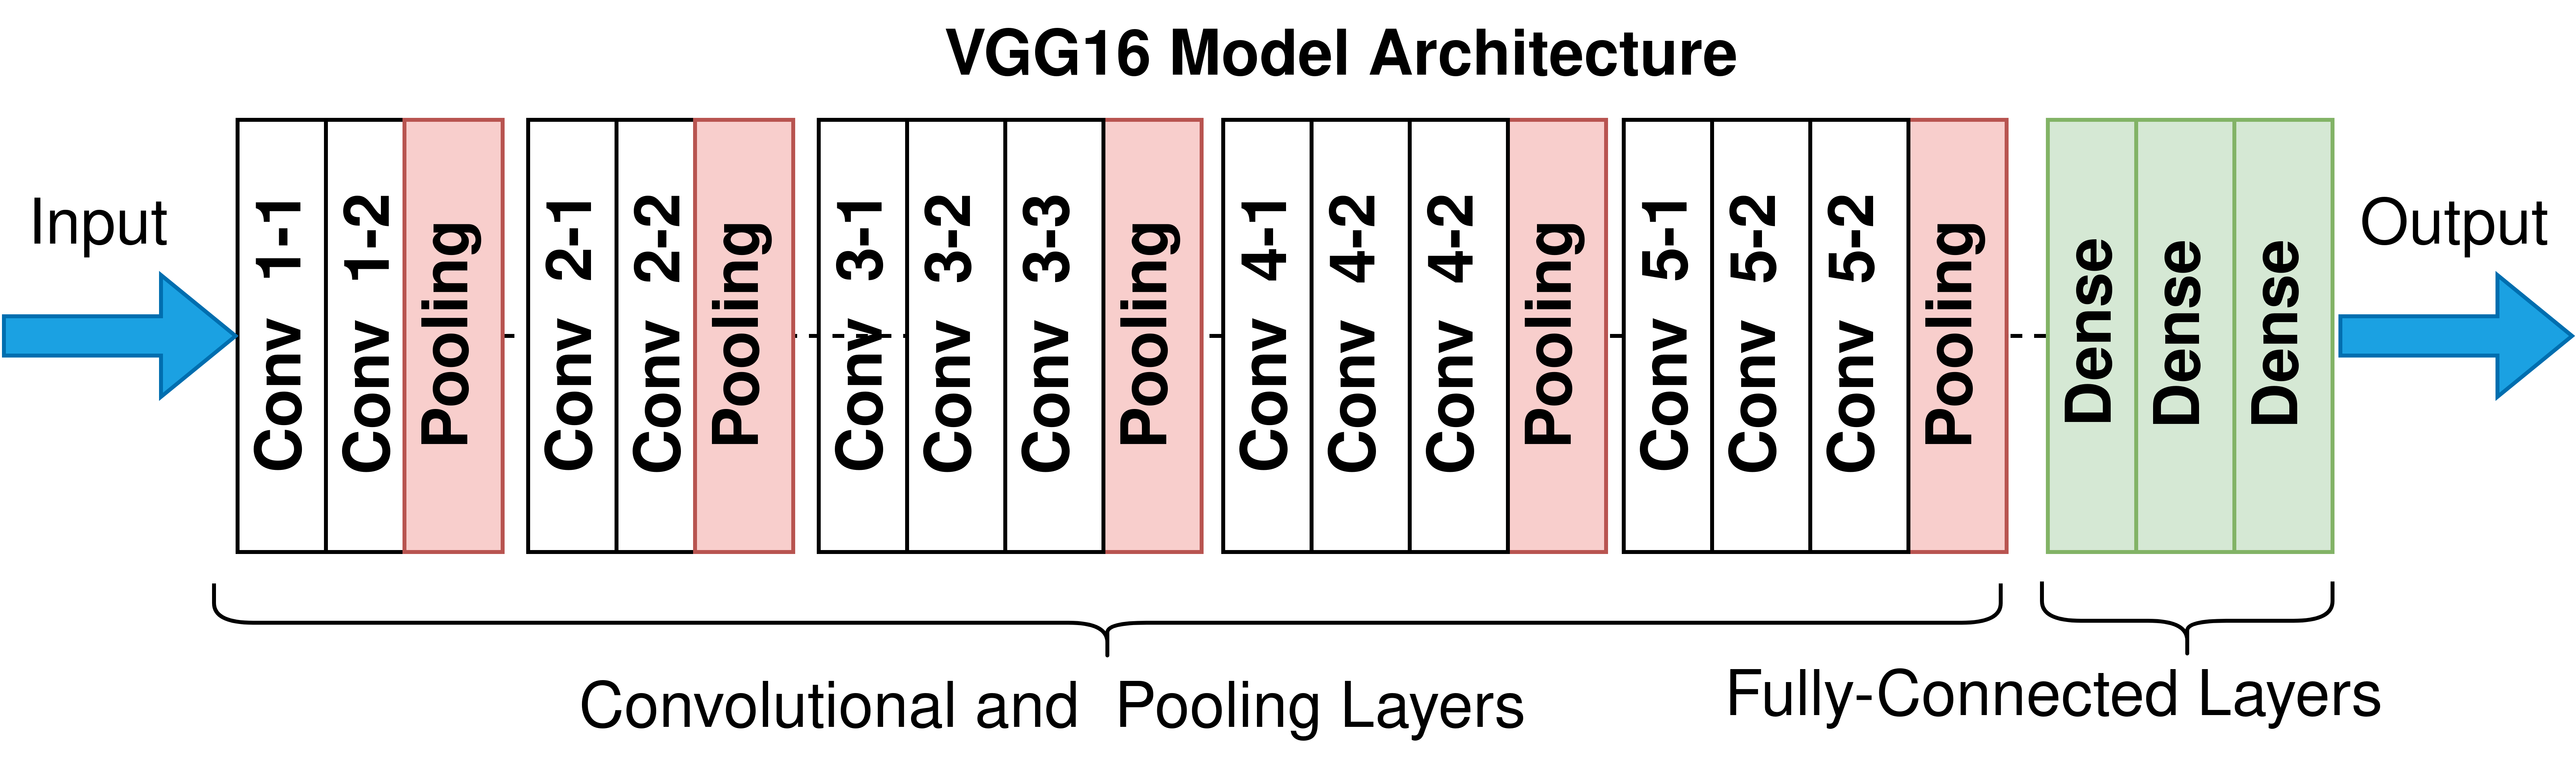

https://commons.wikimedia.org/wiki/File:VGG16.png

###<b> Evaluating the model

In [ ]:
# Evaluating the model on the test data - Checking test accuracy

accuracy = model4_vgg.evaluate(val_generator, verbose = 2)
print(accuracy)
print('\n', 'Model accuracy on test set:', "{0:.2%}".format(accuracy[1],3))

87/87 - 3s - loss: 0.1634 - accuracy: 0.9374 - 3s/epoch - 29ms/step
[0.1634262204170227, 0.9374092817306519]

 Model accuracy on test set: 93.74%


<b>Plotting the classification report and confusion matrix

2/2 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.94      0.97        34

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



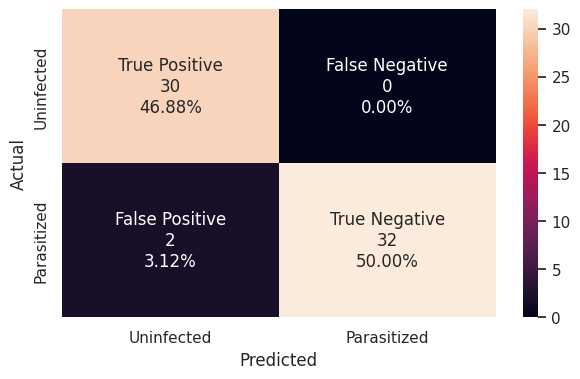

In [ ]:
# Pulling a batch of random testing data for testing after each epoch
testX, testY = next(val_generator)

# Converting each entry of y_test to a single label to obtain categorical values
y_predictions = model4_vgg.predict(testX)
y_predictions = np.argmax(y_predictions, axis = 1)
y_test_arg = np.argmax(testY, axis = 1)

# Printing the classification report
print(classification_report(y_test_arg, y_predictions))

# Plotting the Confusion Matrix using the confusion matrix() function which is also a predefined tensorflow module
# Calculating the confusion matrix
cm=confusion_matrix(y_test_arg, y_predictions)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Uninfected', 'Parasitized']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories)

<B>Building model on Gaussian Blurred images

In [ ]:
# Building CNN model architecture
def cnn_model_GB():
    model = Sequential([ #Intializing sequential model
                        # Adding first convolutional layer with 32 filters and the kernel size of 2x2.
                        # Using the 'same' padding, activation function as "relu" and providing the input shape = (64, 64, 3)
                        Conv2D(32, (2, 2), padding = "same", activation = "relu", input_shape = (64, 64, 3)),
                        Conv2D(32, (2, 2), padding = "same", activation = "relu"),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a third and fourth Convolutional layer with 64 and 128 filters and the kernel size of 2x2 with 'same' padding and activation function as "relu"
                        Conv2D(64, (2, 2), padding = "same", activation = "relu"),
                        Conv2D(128, (2, 2), padding = "same", activation = "relu"),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                         # Adding a fifth Convolutional layer with 256 filters and the kernel size of 2x2 with 'same' padding and activation function as "relu"
                        Conv2D(256, (2, 2), padding = "same", activation = "relu"),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a layer to flatten the output from the previous layer
                        Flatten(),
                        # Adding a dense layer with 512 neurons
                        Dense(512, activation = "relu"),
                        # Adding a dropout layer with the rate equal to 0.4
                        Dropout(0.4),
                         # Adding final dense layer with 2 nodes and activation function as softmax to compute class probabilities
                        Dense(2, activation = "softmax") # 2 represents output layer neurons for the 2 classes
                        ])
    return model

In [ ]:
# Building and compiling the model
# Using Adam optimizer
# optimizer = Adam(learning_rate = 0.005)
optimizer = 'adam'

# Building the model
cnn_modelGB = cnn_model_GB()

# Compiling the model with the loss equal to categorical_crossentropy, and metric equal to 'accuracy'
cnn_modelGB.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating and printing the summary of the model
cnn_modelGB.summary()

#callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


# Fitting the model with set parameters
history_cnn_modelGB = cnn_modelGB.fit(X_train_blur, y_train,
                                batch_size = 32,
                                callbacks = callbacks,
                                validation_split = 0.2,
                                epochs = 20,
                                verbose = 1)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 64, 64, 32)        416       
                                                                 
 conv2d_61 (Conv2D)          (None, 64, 64, 32)        4128      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_53 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 32, 32, 64)        8256      
                                                                 
 conv2d_63 (Conv2D)          (None, 32, 32, 128)       32896     
                                                     

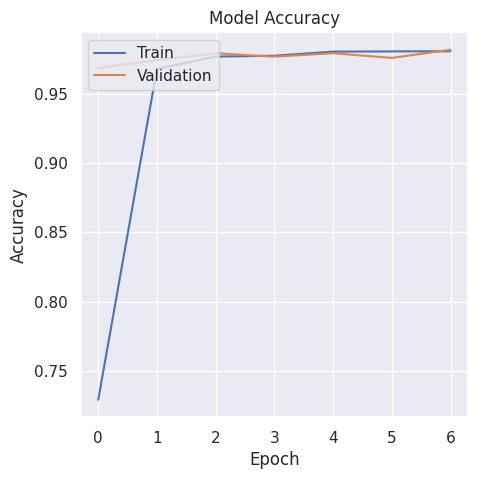

In [ ]:
# Plotting training and validation curves
# set the figure size
plt.figure(figsize = (5,5))
plt.plot(history_cnn_modelGB.history['accuracy'])
plt.plot(history_cnn_modelGB.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

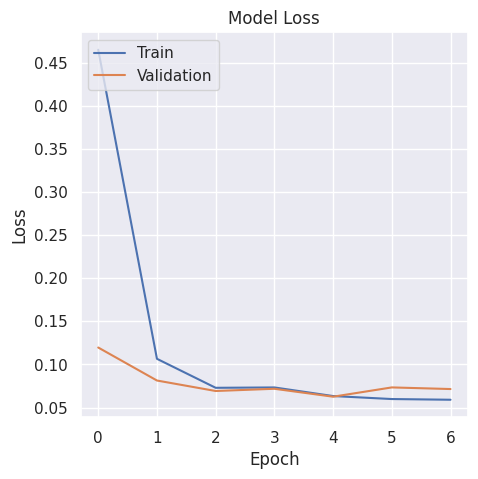

In [ ]:
# Plotting training and validation loss
plt.figure(figsize = (5,5))
plt.plot(history_cnn_modelGB.history['loss'])
plt.plot(history_cnn_modelGB.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the test data - Checking test accuracy

accuracy = cnn_modelGB.evaluate(X_test_blur, y_test, verbose = 2)
print(accuracy)
print('\n', 'Model accuracy on test set:', "{0:.2%}".format(accuracy[1],3))

173/173 - 1s - loss: 0.0699 - accuracy: 0.9813 - 1s/epoch - 6ms/step
[0.06994044780731201, 0.9813135266304016]

 Model accuracy on test set: 98.13%


173/173 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2760
           1       0.98      0.99      0.98      2752

    accuracy                           0.98      5512
   macro avg       0.98      0.98      0.98      5512
weighted avg       0.98      0.98      0.98      5512



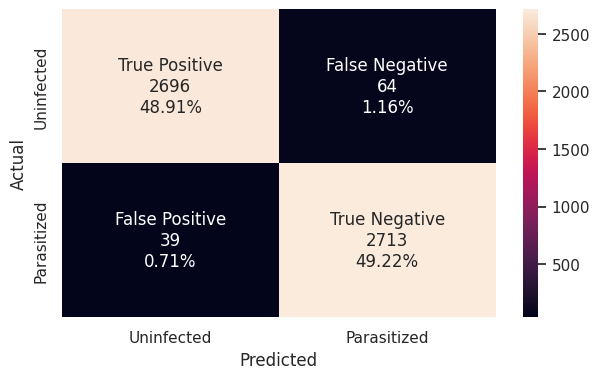

In [ ]:
# Converting each entry of y_test to a single label to obtain categorical values
y_predictions = cnn_modelGB.predict(X_test_blur)
y_predictions = np.argmax(y_predictions, axis = 1)
y_test_arg = np.argmax(y_test, axis = 1)

# Printing the classification report
print(classification_report(y_test_arg, y_predictions))

# Plotting the Confusion Matrix using the confusion matrix() function which is also a predefined tensorflow module
# Calculating the confusion matrix
cm = confusion_matrix(y_test_arg, y_predictions)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Uninfected', 'Parasitized']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories)

In [ ]:
# Fixing seed for random number generators - this aids reproducibility of these results each time this code is run.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

clear_backend # Clearing keras backend

In [ ]:
# Building CNN model architecture
def cnn_model_GB_hsv():
    model = Sequential([ #Intializing sequential model
                        # Adding first convolutional layer with 32 filters and the kernel size of 2x2.
                        # Using the 'same' padding, activation function as "relu" and providing the input shape = (64, 64, 3)
                        Conv2D(32, (2, 2), padding = "same", activation = "relu", input_shape = (64, 64, 3)),
                        Conv2D(32, (2, 2), padding = "same", activation = "relu"),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a third and fourth Convolutional layer with 64 and 128 filters and the kernel size of 2x2 with 'same' padding and activation function as "relu"
                        Conv2D(64, (2, 2), padding = "same", activation = "relu"),
                        Conv2D(128, (2, 2), padding = "same", activation = "relu"),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                         # Adding a fifth Convolutional layer with 256 filters and the kernel size of 2x2 with 'same' padding and activation function as "relu"
                        Conv2D(256, (2, 2), padding = "same", activation = "relu"),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D(2,2),
                        # Adding a dropout layer with the rate equal to 0.2
                        Dropout(0.2),
                        # Adding a layer to flatten the output from the previous layer
                        Flatten(),
                        # Adding a dense layer with 512 neurons
                        Dense(512, activation = "relu"),
                        # Adding a dropout layer with the rate equal to 0.4
                        Dropout(0.4),
                         # Adding final dense layer with 2 nodes and activation function as softmax to compute class probabilities
                        Dense(2, activation = "softmax") # 2 represents output layer neurons for the 2 classes
                        ])
    return model

In [ ]:
# Building and compiling the model
# Using Adam optimizer
# optimizer = Adam(learning_rate = 0.005)
optimizer = 'adam'

# Building the model
cnn_modelGB_hsv = cnn_model_GB_hsv()

# Compiling the model with the loss equal to categorical_crossentropy, and metric equal to 'accuracy'
cnn_modelGB_hsv.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating and printing the summary of the model
cnn_modelGB_hsv.summary()

#callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


# Fitting the model with set parameters
history_cnn_modelGB_hsv = cnn_modelGB_hsv.fit(X_train_hsv_blur, y_train,
                                batch_size = 32,
                                callbacks = callbacks,
                                validation_split = 0.2,
                                epochs = 20,
                                verbose = 1)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 64, 64, 32)        416       
                                                                 
 conv2d_66 (Conv2D)          (None, 64, 64, 32)        4128      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_57 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_67 (Conv2D)          (None, 32, 32, 64)        8256      
                                                                 
 conv2d_68 (Conv2D)          (None, 32, 32, 128)       32896     
                                                     

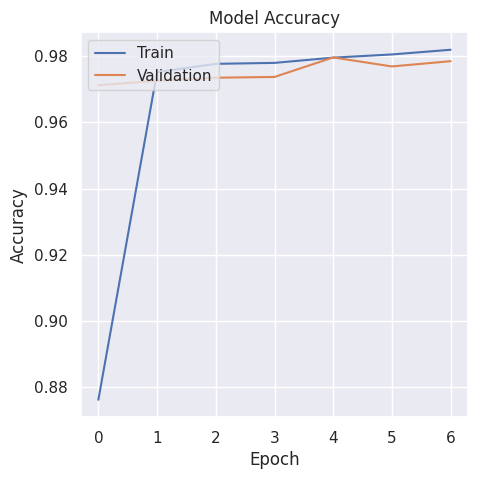

In [ ]:
# Plotting training and validation curves
# set the figure size
plt.figure(figsize = (5,5))
plt.plot(history_cnn_modelGB_hsv.history['accuracy'])
plt.plot(history_cnn_modelGB_hsv.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

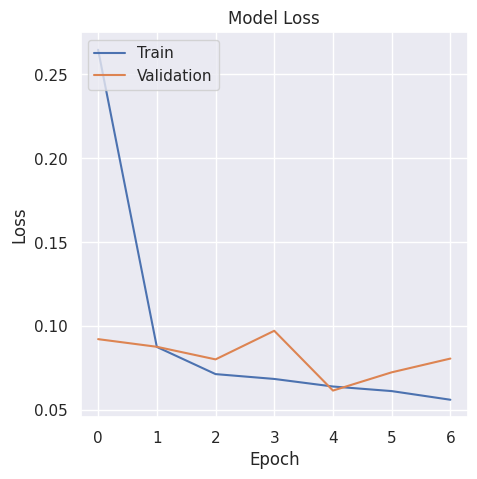

In [ ]:
# Plotting training and validation loss
plt.figure(figsize = (5,5))
plt.plot(history_cnn_modelGB_hsv.history['loss'])
plt.plot(history_cnn_modelGB_hsv.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model on the test data - Checking test accuracy

accuracy = cnn_modelGB_hsv.evaluate(X_test_hsv_blur, y_test, verbose = 2)
print(accuracy)
print('\n', 'Model accuracy on test set:', "{0:.2%}".format(accuracy[1],3))

173/173 - 1s - loss: 0.0761 - accuracy: 0.9791 - 948ms/epoch - 5ms/step
[0.07610301673412323, 0.9791364073753357]

 Model accuracy on test set: 97.91%


173/173 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.79      0.15      0.25      2760
           1       0.53      0.96      0.68      2752

    accuracy                           0.55      5512
   macro avg       0.66      0.56      0.47      5512
weighted avg       0.66      0.55      0.47      5512



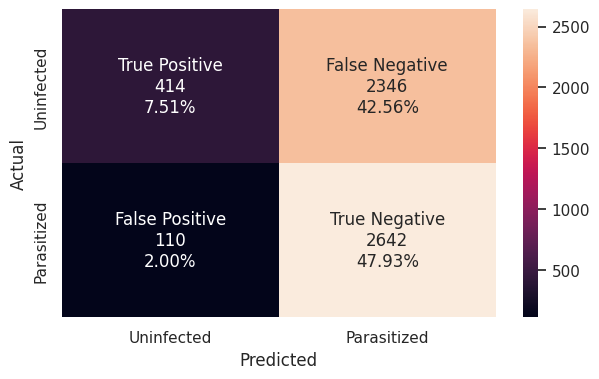

In [ ]:
# Converting each entry of y_test to a single label to obtain categorical values
y_predictions = cnn_modelGB_hsv.predict(X_test_blur)
y_predictions = np.argmax(y_predictions, axis = 1)
y_test_arg = np.argmax(y_test, axis = 1)

# Printing the classification report
print(classification_report(y_test_arg, y_predictions))

# Plotting the Confusion Matrix using the confusion matrix() function which is also a predefined tensorflow module
# Calculating the confusion matrix
cm = confusion_matrix(y_test_arg, y_predictions)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Uninfected', 'Parasitized']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories)

####<b> Final Observations, Conclusions, Recommendations and Key-Takeaways




### <font color='#19597C'><font size='4'><i>Summary of the overall methodology</i></font>

The overall objective of this project was to build an automated and efficient model to detect malaria by distinguishing malaria parasitized red blood cells from uninfected red blood cells, and thus classify which cells are parasitized and which are not (uninfected).

<i>Please see above sections for details on each of the following approaches.</i>

The data utilized in this project comprised of 24,958 images in the train set and 2,600 images in the test set that were taken from microscopic images and categorized as parasitized or uninfected cells.

Overall, data exploration was done to obtain a good understanding of the data by examining what the images look like and whether they are colored to show for the 4-D representation we needed to work with. Image characteristics by class to identify whether there are differences in sizes, shapes and color intensities in the images from each class/category was also conducted, and the images resized. I also went on to check what proportion of the data represents both training and testing sets and noted a 90:10 ratio. The data were split again into an 80:20 ratio aiming for optimal results. The data were then checked to see if it were balanced as this is key for neural network performance and to prevent the models from being biased towards one class.
The data were further normalized to have pixel values ranging between 0-1. This is largely done to avoid exploding gradient problems which occur when large error gradients accumulate and result in very large updates to model weights during training. This makes the models unstable and unable to learn from the training data - we therefore don't want very high or very low values.
The images were also converted to the HSV (Hue Saturation Value) color space to improve color image segmentation. A gaussian blurring filter was also applied on the data to smoothen and reduce the amount of noise and to check whether these transformations on the data could improve model performance. The data was converted from categorical variables to binary vectors (one-hot encoding), a representation that is easier for neural networks to work with and to further improve accuracy. Finally, data augmentation was also applied to the data and tested on some models to check the utility of this technique in improving model accuracy. Data augmentation largely makes models more robust by making them invariant to image transitions or orientations (Please see above for details).

****
For this challenge, Convolutional Neural Networks (CNN) were opted for over Artificial Neural Networks (ANN) (both Deep Learning algorithms) due to the ability of CNNs to work with more complex imaging data and derive important features needed to make accurate predictions without requiring manual feature engineering or preprocessing.

### <font color='#19597C'><font size='4'><i>Developled models</i></font>
The table below provides a summary of CNN models that were built during the course of this project. Key details, model parameters and outputs on model accuracy and performance metrics are also provided in the table.

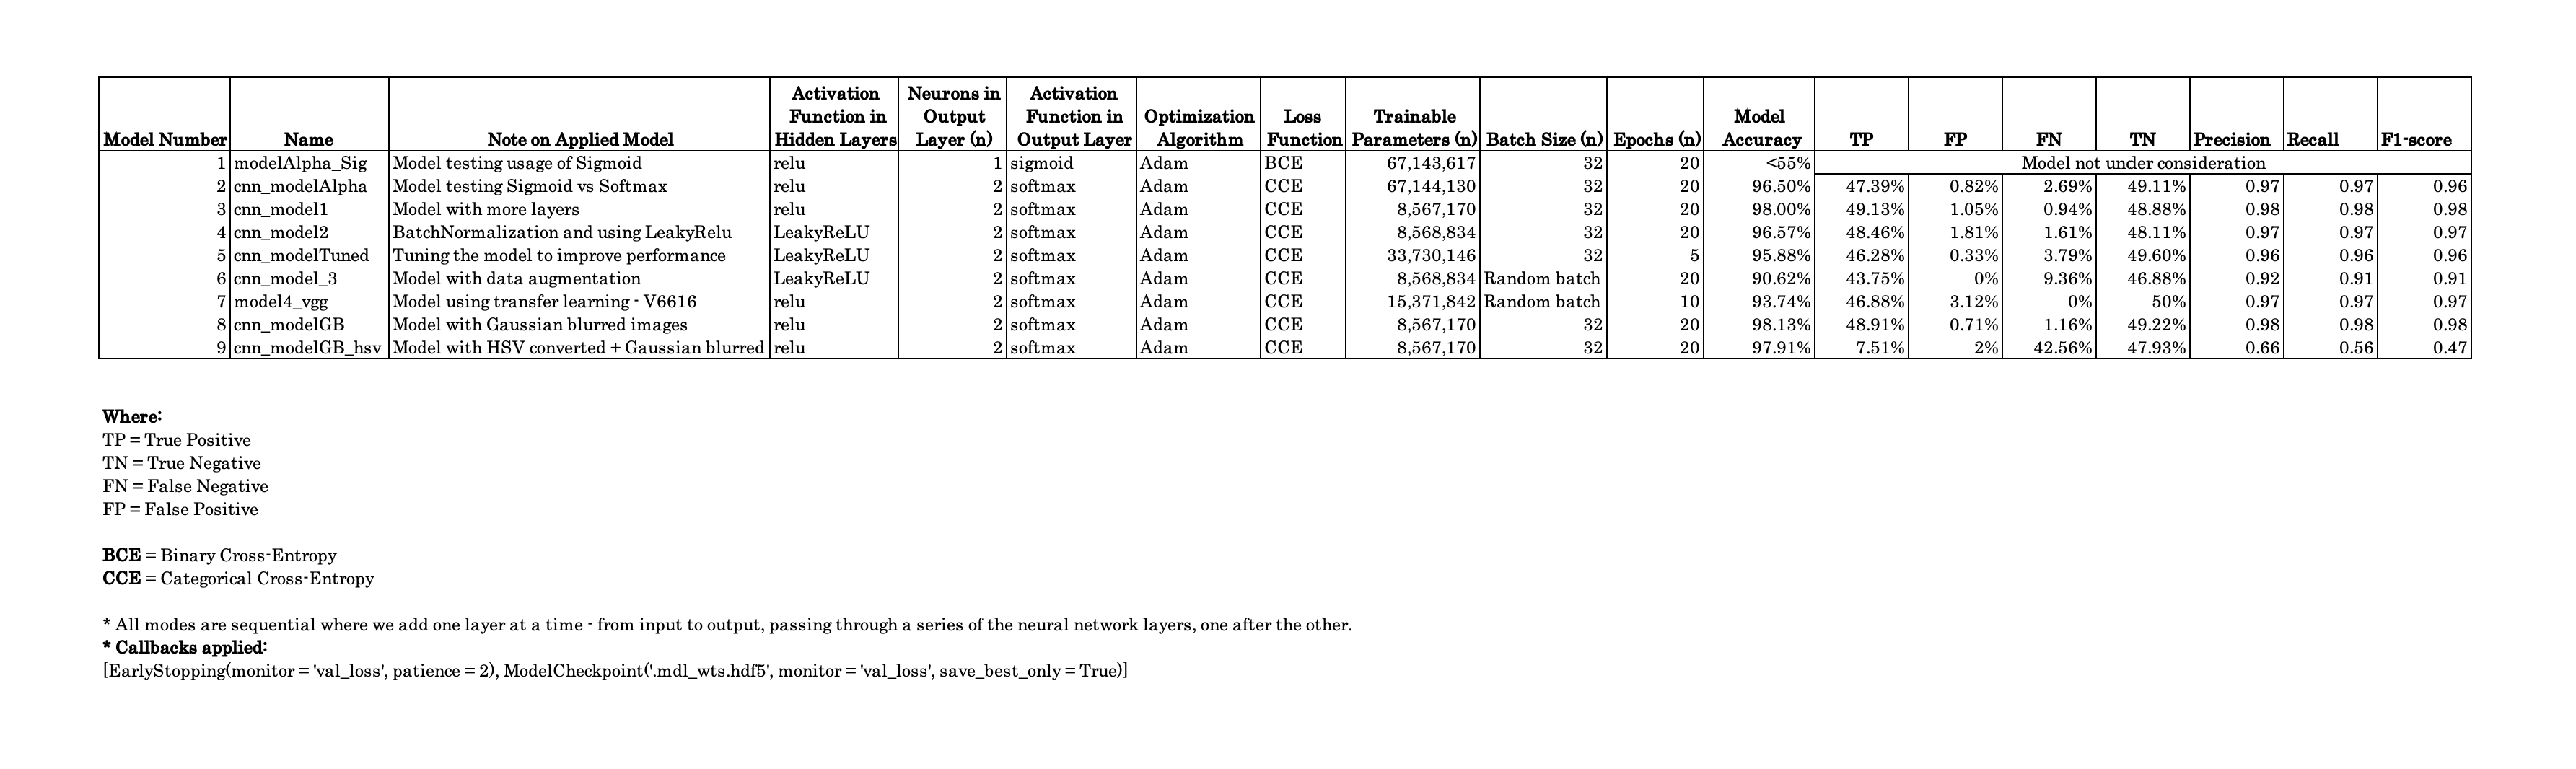

In total, nine models were built using different architectural layouts and model parameters/or hyperparameters, including models that were built and trained on cell images that underwent different transformations or conversions, for example Gaussian blurring, converting input images from the RGB color space to HSV, image augmentation, and finally leveraging pre-trained models aimed at improving our built models.

### <font color='#19597C'><font size='4'><i>Key performance metric:</i></font>

The key metric chosen to assess model performance for this classification problem is the F1-score. The F1-score is an encapsulation of two key parameters that are both important for our classification problem and that is ‘precision’ and ‘recall’. Fundamentally, precision is the proportion of total positive predictions that are actually correct while recall is the proportion of total actual positive cases that are predicted correctly – of all actual positive cases, how many were correctly classified. Why these two metrics are important is because we wouldn’t want to predict a patient not to have malaria and yet they do which implies that they may or will not get the treatment they need in time which may end up being a detrimental outcome. On the other hand, we don’t want to predict that a patient has malaria when they don’t. This is important too but lesser than the latter because the person tested positive for malaria may be put on drugs which they shouldn’t be taking in the first place. As is the case with cancer treatment, some drugs are cytotoxic, so we don’t want to predict that a patient has malaria when they don’t to avoid starting them on treatment (sometimes harmful) that also comes at a hefty cost.

### <font color='#19597C'><font size='4'><i>Details on applied and chosen model:- insights and a comparison of models and techniques</i></font>

Model 1 and 2 were largely a comparison between the optimal activation function for the output layers and the corresponding loss function. As the last year of our CNNs could either have sigmoid (with 1 output neuron that outputs 0/1, YES/NO and loss function as binary cross entropy) or softmax (with 2 neurons to output probabilities for each class and loss function as categorical cross entropy) as the activation functions, model 1 and 2 were built to check performance of the models under these two settings, holding all other parameters constant. Both models have almost the same number of trainable parameters (~67,140,000). Model 1 performed quite poorly (accuracy < 55%) compared to model 2. Models 3 to 9 where hence built using ‘softmax’ as the activation function in the output layer and ‘categorical cross entropy’ as the loss function.

Hyperparameter optimization was conducted using RandomSearchCV to optimize the learning rate, batch size, number of epochs and optimal activation function, however, this did not result into the best model with more tuning needed and more optimization methods like Grid search that could be applied to get an optimal model. No improvement was seen with BatchNormalization and using LeakyRelu, this model can further be fine-tuned by adjusting the number of layers in the model. Model 3 that was trained on augmented data achieve an accuracy of 91%, on a random batch of n=64, we see that no uninfected cells were predicted as parasitized while 6 cells (9.38%) were predicted parasitized yet uninfected. Given that all cells are circular and when rotated along the central axis, may still give a somewhat similar shape but for cells that may be deformed or not conforming to what normal cells look like. It would be worth investigating the effects of augmentation on such images that take on almost the same shape unlike large variations seen when the orientation of images such as dogs, cats or houses changes. This model needs to be trained on more and larger batches to assess the model more. Model 7 was built to leverage transfer learning by taking pre-trained features from the VGG16 ImageNet dataset that has a large number of images that could give a good representation of our data and on top of which our classifier was built. This model was also trained on a random batch of cells, n=64 and achieved an accuracy of 93.74%. 2 cells were misclassified as uninfected when they are parasitized while none of the uninfected cells were predicted as parasitized. Finally, two more models on both Gaussian blurred (model 8) and Gaussian blurred + HSV images were run (model 9). Model 8 achieved an accuracy of 98.13%, precision, recall and the F1-score at 0.98 while model 9 performed comparably poorly based on precision, recall and the F1-score (<0.8). This double transformation could have distorted the images, obstructing key features needed for classification with further investigations needed to see whether Gaussian blurring on HSV color images conceals key features.

For recall to be high, we need to reduce false negatives and for precision to be high, we need to reduce false positives. These two metrics together with the F1-score were largely uses to decide the best model. Model 3 and 8 (with Gaussian blurred images) performed comparably well, however, model 3 has fewer false negatives compared to model 8 – other metrics considered as well. We also see that despite its accuracy being lower, model 7 on transfer learning has no uninfected cells that were misclassified as parasitized, and we also see from the model summary and accuracy plots that the accuracy is slightly better on the validation set compared to the training set which would imply that we could slightly tune our dropout rate or review the architecture in general. We also see that model accuracy drops after epoch 4. Because of these reasons and the need to conduct cross validation especially on model 6 and 7, model 1 is recommended.


The input shape of the network in model 1 is (64, 64, 3) with 5 convolution layers for feature extraction using 32, 32, 64, 128 and 256 filters respectively and 3 maxpooling layers to reduce the image sizes by retaining only the most prominent features. Also added are 4 dropout layers to switch 20% and 40% of the neurons off randomly at each iteration to avoid overfitting and to improve model performance (Please see architecture above). The activation function used is relu and the model also has a Flatten layer to flatten the output from the previous network layer and the final output layer – a dense layer with 2 neurons for the 2 classes and softmax as the activation function. The loss function used is categorical cross entropy with adam as the optimizer. Callbacks are as mentioned above that allowed only for the best results of the model through early stopping that stops the training once the model's performance stops improving on the validation dataset with patience 2. All layers have trainable parameters apart from the max_pooling, dropout, and flatten layers. Overall, the model had a total of 8,567,170 weights, or trainable parameters (from the respective layers) that needed to be learned by the neural network. The model achieved an accuracy of 98% and precision, recall and F1-score of 0.98. We also see that for both training and test sets, as the loss function decreases, accuracy increases with no overfitting seen in the model.


### <font color='#19597C'><font size='4'><i>Recommendations and future work</i></font>

* Overall, hyperparameter tuning needs to be done on majority of the models to aim for higher accuracy and a higher F1-score, however our models largely achieved good performance (>98% accuracy and 0.98 F1-score). For this, other hyperparameter optimization methods can be tested as well.

* For the chosen model and majority of the models that performed well (7/9), it would be a great addition to conduct K/5-fold cross validation to further assess how well the developed models are performing and how well they will predict new datasets.

* More pre-trained CNN architectures like ResNet and AlexNet could also be leveraged to see whether they can improve our predictions.

* The malaria parasite is comprised of four types and undergoes a number of distinguishable stages of development (Please see image below). Depending on the developmental stage and type, the parasites can be spherical, ring shaped, elongated, or crescent shaped, and can range in size from 1 to 20 microns in diameter. By comparison, a normal red blood cell has a diameter of about 7 microns. Given this knowledge, when we resize our images, we need to put into consideration that parasitized cells on average are larger than normal cells and therefoe when resizing the cell images, a threashold that maintains this level of detail that could be leveraged by our CNNs needs to be set. Besides differences in size, we also saw differences in shape and color intensities in the two image classes. Future work could involve stratifying these cells further and to look deeper into possible stages at which these cells are based on extracted characteristics and/or more data on the images. More of these details can 1) improve our predictions 2) provided more details that can be used to aid patient treatment.


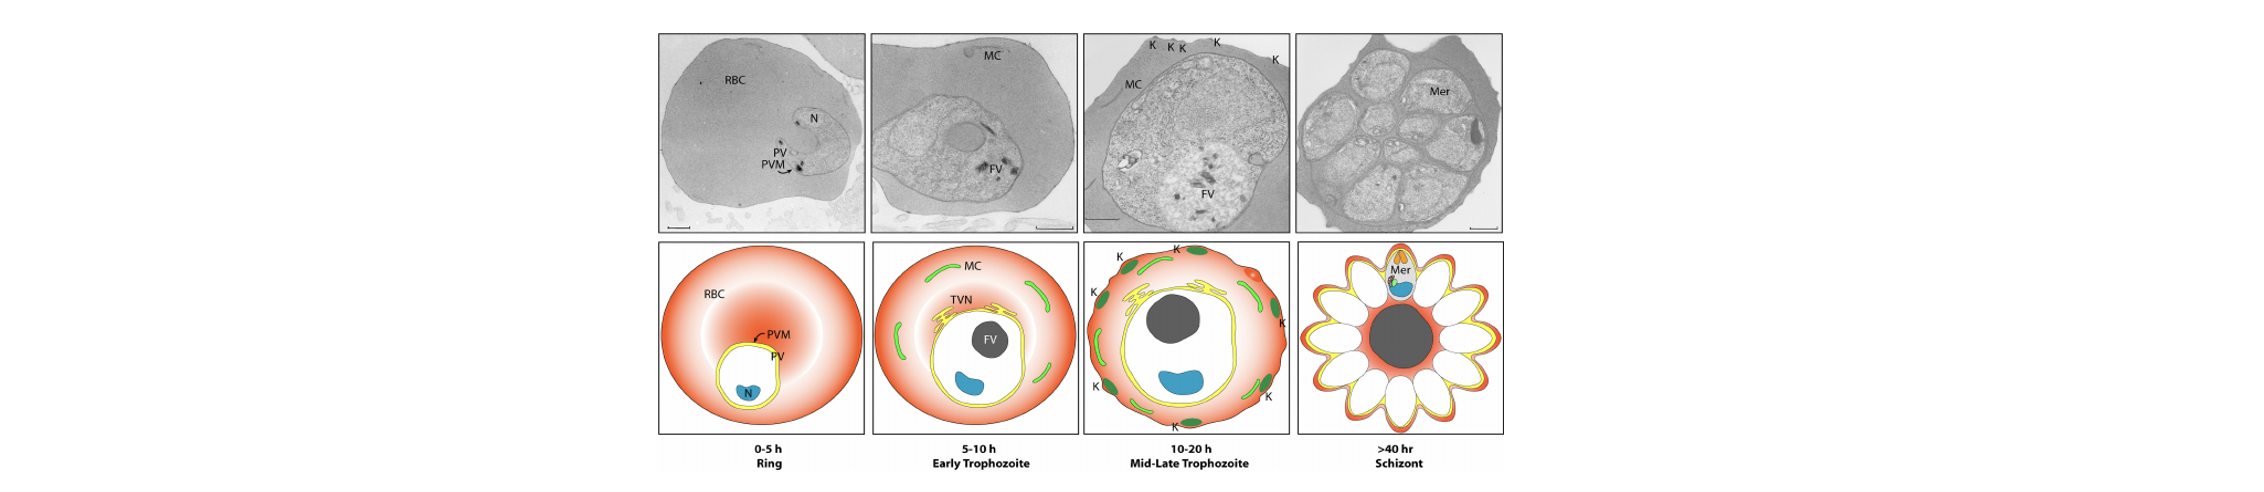

### <font color='#19597C'><font size='4'><i>Conclusion</i></font>

Current malaria detection methods that rely on microscopic images are quite tedious, subject to a pathologist’s expertise and are characterized by limited accuracy. In this project, a CNN model, based on an end-to-end artificial neural network was developed to improve malarial prediction from colored thin blood smear images. The achieved results from the developed model prove that the developed architecture has great capacity to extract different abstract level features for cell classification. With a model accuracy of 98%, precision, recall and F1-score of 0.98, this model has great potential in making accurate malaria predictions and will be of great utility in the clinical setting to distinguish malaria parasitized from uninfected cells and consequently provide timely treatment to patients diagnosed with malaria.

References:

https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2021

https://www.cdc.gov/malaria/diagnosis_treatment/diagnosis.html

https://malariajournal.biomedcentral.com/articles/10.1186/1475-2875-10-91

https://www.medmastery.com/guides/malaria-clinical-guide/how-identify-type-malaria-blood-smear#:~:text=When%20looking%20at%20a%20blood,cells%20and%20crescent-shaped%20gametocytes.

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

https://www.mygreatlearning.com/blog/understanding-data-augmentation/

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

https://keras.io/guides/keras_tuner/

https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/

https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#gaussianblur





